# 1. CARGA DE DATOS

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 500)
pd.set_option('display.float_format', '{:.2f}'.format)

In [106]:
## Carga de datos desde Dropbox

url = "https://www.dropbox.com/scl/fi/mbckz5ce5c5qke9330i4m/icfes.csv?rlkey=d9ipf96vuwbq6mmmjqnxfv3vw&st=ksckq0wg&dl=1"
icfes = pd.read_csv(url, sep=None, engine="python")

icfes.head(4)

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_TIENEETNIA,ESTU_PAIS_RESIDE,ESTU_ETNIA,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_MCPIO_RESIDE,ESTU_COD_RESIDE_MCPIO,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_NUMLIBROS,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_SITUACIONECONOMICA,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,COLE_CODIGO_ICFES,COLE_COD_DANE_ESTABLECIMIENTO,COLE_NOMBRE_ESTABLECIMIENTO,COLE_GENERO,COLE_NATURALEZA,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,COLE_COD_DANE_SEDE,COLE_NOMBRE_SEDE,COLE_SEDE_PRINCIPAL,COLE_AREA_UBICACION,COLE_JORNADA,COLE_COD_MCPIO_UBICACION,COLE_MCPIO_UBICACION,COLE_COD_DEPTO_UBICACION,COLE_DEPTO_UBICACION,ESTU_PRIVADO_LIBERTAD,ESTU_COD_MCPIO_PRESENTACION,ESTU_MCPIO_PRESENTACION,ESTU_DEPTO_PRESENTACION,ESTU_COD_DEPTO_PRESENTACION,PUNT_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,DESEMP_LECTURA_CRITICA,PUNT_MATEMATICAS,PERCENTIL_MATEMATICAS,DESEMP_MATEMATICAS,PUNT_C_NATURALES,PERCENTIL_C_NATURALES,DESEMP_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E
0,TI,COLOMBIA,M,18/02/2002,20194,SB11201940031558,ESTUDIANTE,No,COLOMBIA,-,MAGDALENA,47,SANTA ANA,47707,Estrato 3,5 a 6,Cinco,Educación profesional completa,Secundaria (Bachillerato) completa,No aplica,"Trabaja en el hogar, no trabaja o estudia",Si,Si,No,Si,Si,No,No,No,MÁS DE 100 LIBROS,1 o 2 veces por semana,3 a 5 veces por semana,Nunca o rara vez comemos eso,Peor,Entre 30 y 60 minutos,Entre 30 y 60 minutos,Menos de 10 horas,"Si, en efectivo",39008,"1,48E+11",INSTITUCION EDUCATIVA DEPARTAMENTAL ANTONIO BR...,MIXTO,OFICIAL,A,N,TÉCNICO/ACADÉMICO,"1,48E+11",COL DPTAL ANTONIO BRUGES CARMONA,S,URBANO,MAÑANA,47707,SANTA ANA,47,MAGDALENA,N,47707,SANTA ANA,MAGDALENA,47,47,33,2,48,42,2,37,15,1,30,8,1,54.00,67,A1,208,25,509.421.557.404.314,2,2.00,PUBLICAR,NO
1,TI,COLOMBIA,M,28/06/2003,20194,SB11201940303339,ESTUDIANTE,No,COLOMBIA,-,BOGOTÁ,11,BOGOTÁ D.C.,11001,Estrato 3,9 o más,Tres,Técnica o tecnológica completa,Técnica o tecnológica completa,Trabaja por cuenta propia (por ejemplo plomero...,Es dueño de un negocio pequeño (tiene pocos em...,Si,Si,Si,Si,Si,Si,No,No,MÁS DE 100 LIBROS,Todos o casi todos los días,3 a 5 veces por semana,1 o 2 veces por semana,Mejor,Entre 30 y 60 minutos,Entre 30 y 60 minutos,Menos de 10 horas,"Si, en efectivo",128611,"3,11E+11",GIMN SAN ANGELO,MIXTO,NO OFICIAL,A,-,ACADÉMICO,"3,11E+11",GIMN SAN ANGELO,S,URBANO,COMPLETA,11001,BOGOTÁ D.C.,11,BOGOTÁ,N,11001,BOGOTÁ D.C.,BOGOTÁ,11,60,76,3,65,88,3,54,71,2,59,83,3,63.00,88,A2,299,83,59.767.864.431.576,3,4.00,PUBLICAR,NO
2,TI,COLOMBIA,M,2/06/2001,20194,SB11201940255017,ESTUDIANTE,No,COLOMBIA,-,BOLIVAR,13,CARTAGENA DE INDIAS,13001,Estrato 1,5 a 6,Dos,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Es vendedor o trabaja en atención al público,Es vendedor o trabaja en atención al público,No,Si,No,Si,No,No,No,No,26 A 100 LIBROS,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual,Entre 30 y 60 minutos,Más de 3 horas,0,"Si, en efectivo",35493,"1,13E+11",INSTITUCION EDUCATIVA PROMOCION SOCIAL DE C/GENA.,MIXTO,OFICIAL,A,N,TÉCNICO/ACADÉMICO,"1,13E+11",INSTITUCION EDUCATIVA PROMOCION SOCIAL DE C/GENA.,S,URBANO,MAÑANA,13001,CARTAGENA DE INDIAS,13,BOLIVAR,N,13001,CARTAGENA DE INDIAS,BOLIVAR,13,66,91,4,57,70,3,41,29,2,74,99,4,64.00,89,A2,299,84,507.642.383.644.749,2,3.00,PUBLICA

##

# 1.1 COMPRENSIÓN DE LOS DATOS

###
1. Análisis de dimensiones: Random Forest funciona bien con muchas variables
2. Inspección de tipos de datos (numéricos, categóricos, texto, temporales)
3. Identificación de valores faltantes (RF puede manejarlos internamente)
4. Verificación de cardinalidad de variables categóricas
5. Verificación de consistencia en formatos de datos

## INFORMACIÓN TABULAR

### 1. ANÁLISIS DE DIMENSIONES

In [107]:
print(f'El dataframe se compone por {icfes.shape[0]} filas y {icfes.shape[1]} columnas')

El dataframe se compone por 546212 filas y 82 columnas


### 2. INSPECCIÓN DE TIPOS DE DATOS

In [108]:
# Numéricas
print("📊 Variables numéricas:")
print(icfes.select_dtypes(include=["int64", "float64"]).columns.tolist())

# Categóricas
print("\n🔤 Variables categóricas:")
print(icfes.select_dtypes(include=["object"]).columns.tolist())

# Booleanas
print("\n✅ Variables booleanas:")
print(icfes.select_dtypes(include=["bool"]).columns.tolist())

# Fechas
print("\n📅 Variables de tipo fecha:")
print(icfes.select_dtypes(include=["datetime"]).columns.tolist())


📊 Variables numéricas:
['PERIODO', 'COLE_CODIGO_ICFES', 'COLE_COD_MCPIO_UBICACION', 'COLE_COD_DEPTO_UBICACION', 'ESTU_COD_MCPIO_PRESENTACION', 'ESTU_COD_DEPTO_PRESENTACION', 'PUNT_LECTURA_CRITICA', 'PERCENTIL_LECTURA_CRITICA', 'DESEMP_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PERCENTIL_MATEMATICAS', 'DESEMP_MATEMATICAS', 'PUNT_C_NATURALES', 'PERCENTIL_C_NATURALES', 'DESEMP_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PERCENTIL_SOCIALES_CIUDADANAS', 'DESEMP_SOCIALES_CIUDADANAS', 'PUNT_INGLES', 'PERCENTIL_INGLES', 'PUNT_GLOBAL', 'ESTU_NSE_ESTABLECIMIENTO']

🔤 Variables categóricas:
['ESTU_TIPODOCUMENTO', 'ESTU_NACIONALIDAD', 'ESTU_GENERO', 'ESTU_FECHANACIMIENTO', 'ESTU_CONSECUTIVO', 'ESTU_ESTUDIANTE', 'ESTU_TIENEETNIA', 'ESTU_PAIS_RESIDE', 'ESTU_ETNIA', 'ESTU_DEPTO_RESIDE', 'ESTU_COD_RESIDE_DEPTO', 'ESTU_MCPIO_RESIDE', 'ESTU_COD_RESIDE_MCPIO', 'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR', 'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE', 'FAMI_TRABAJOLABORPADRE', 'FAMI_TRABAJ

In [109]:
# Numéricas
numeric_cols = icfes.select_dtypes(include=["int64", "float64"]).columns.tolist()
print("📊 Variables numéricas:", len(numeric_cols))

# Categóricas
categorical_cols = icfes.select_dtypes(include=["object"]).columns.tolist()
print("🔤 Variables categóricas:", len(categorical_cols))

# Booleanas
bool_cols = icfes.select_dtypes(include=["bool"]).columns.tolist()
print("✅ Variables booleanas:", len(bool_cols))

# Fechas
date_cols = icfes.select_dtypes(include=["datetime"]).columns.tolist()
print("📅 Variables de tipo fecha:", len(date_cols))


📊 Variables numéricas: 22
🔤 Variables categóricas: 60
✅ Variables booleanas: 0
📅 Variables de tipo fecha: 0


In [110]:
icfes.columns

Index(['ESTU_TIPODOCUMENTO', 'ESTU_NACIONALIDAD', 'ESTU_GENERO',
       'ESTU_FECHANACIMIENTO', 'PERIODO', 'ESTU_CONSECUTIVO',
       'ESTU_ESTUDIANTE', 'ESTU_TIENEETNIA', 'ESTU_PAIS_RESIDE', 'ESTU_ETNIA',
       'ESTU_DEPTO_RESIDE', 'ESTU_COD_RESIDE_DEPTO', 'ESTU_MCPIO_RESIDE',
       'ESTU_COD_RESIDE_MCPIO', 'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR',
       'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
       'FAMI_TRABAJOLABORPADRE', 'FAMI_TRABAJOLABORMADRE',
       'FAMI_TIENEINTERNET', 'FAMI_TIENESERVICIOTV', 'FAMI_TIENECOMPUTADOR',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENEAUTOMOVIL',
       'FAMI_TIENEMOTOCICLETA', 'FAMI_TIENECONSOLAVIDEOJUEGOS',
       'FAMI_NUMLIBROS', 'FAMI_COMELECHEDERIVADOS',
       'FAMI_COMECARNEPESCADOHUEVO', 'FAMI_COMECEREALFRUTOSLEGUMBRE',
       'FAMI_SITUACIONECONOMICA', 'ESTU_DEDICACIONLECTURADIARIA',
       'ESTU_DEDICACIONINTERNET', 'ESTU_HORASSEMANATRABAJA',
       'ESTU_TIPOREMUNERACION', 'COLE_C

### 3. IDENTIFICAR VALORES FALTANTES

In [111]:
import pandas as pd

# Filtrar solo las columnas con NA
na_counts = icfes.isna().sum()
na_counts = na_counts[na_counts > 0]  # Solo variables con NAs

# Calcular el porcentaje de NAs sobre el total de observaciones
na_percentage = (na_counts / len(icfes)) * 100

# Crear DataFrame con los resultados
na_summary = pd.DataFrame({'Variable': na_counts.index, 'Conteo_NA': na_counts.values, 'Porcentaje_NA': na_percentage.values})

# Ordenar por porcentaje de NA
na_summary = na_summary.sort_values(by="Porcentaje_NA", ascending=False)

# Mostrar la tabla
print(na_summary)

                         Variable  Conteo_NA  Porcentaje_NA
23        ESTU_DEDICACIONINTERNET      30298           5.55
20  FAMI_COMECEREALFRUTOSLEGUMBRE      22332           4.09
18        FAMI_COMELECHEDERIVADOS      22305           4.08
10           FAMI_TIENESERVICIOTV      22280           4.08
6             FAMI_EDUCACIONMADRE      20959           3.84
29            ESTU_NSE_INDIVIDUAL      17041           3.12
25          ESTU_TIPOREMUNERACION      15508           2.84
26                  COLE_CARACTER      13748           2.52
19     FAMI_COMECARNEPESCADOHUEVO       9625           1.76
15          FAMI_TIENEMOTOCICLETA       8817           1.61
17                 FAMI_NUMLIBROS       8654           1.58
13       FAMI_TIENEHORNOMICROOGAS       8630           1.58
3              FAMI_PERSONASHOGAR       8463           1.55
9              FAMI_TIENEINTERNET       8337           1.53
5             FAMI_EDUCACIONPADRE       8292           1.52
21        FAMI_SITUACIONECONOMICA       

<Axes: >

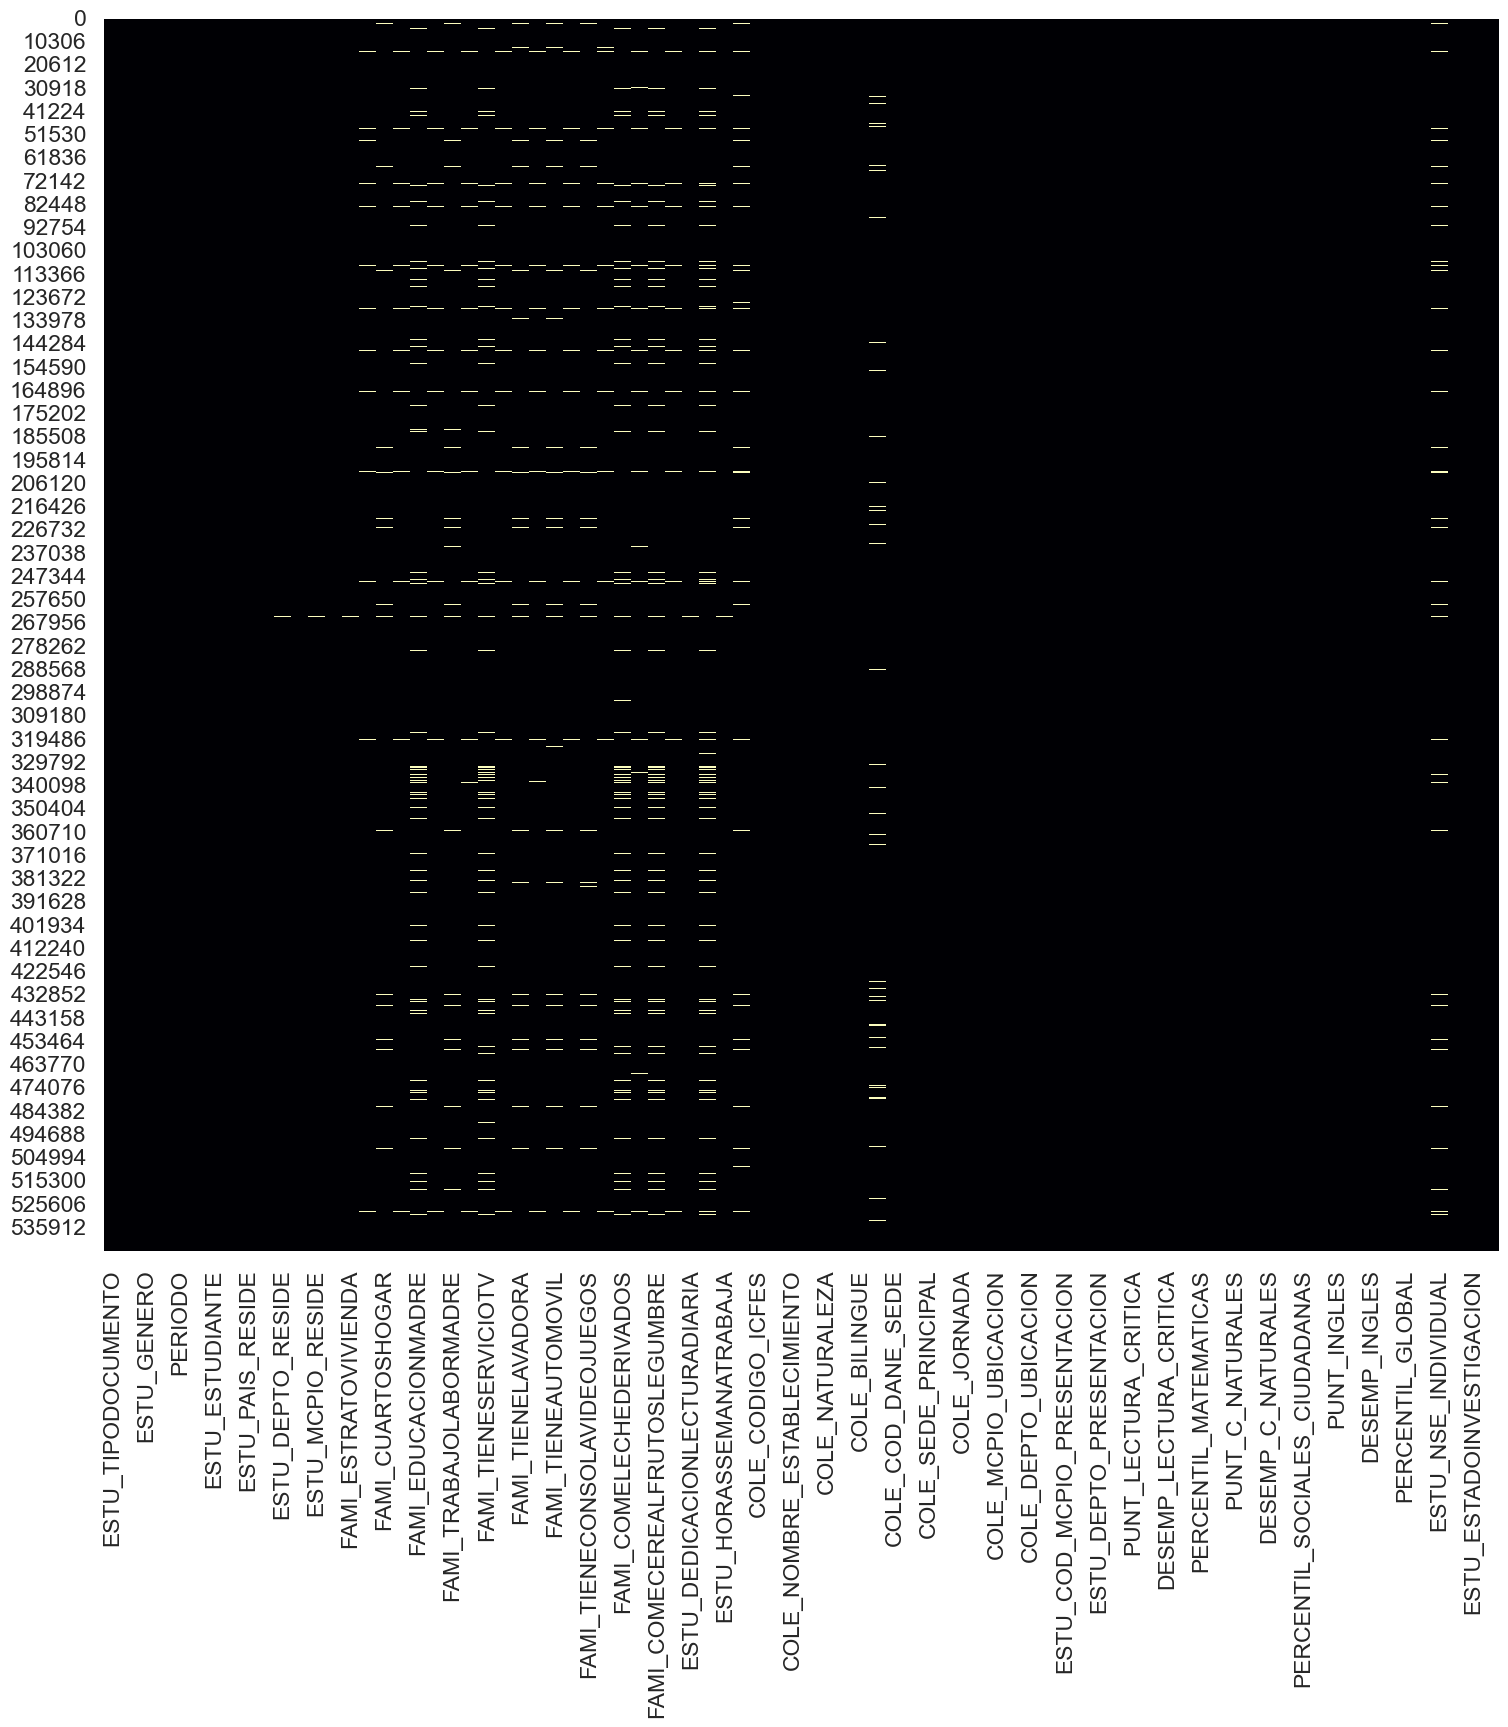

In [112]:
plt.figure(figsize=(18, 16))
sns.heatmap(icfes.isnull(),cmap = 'magma',cbar = False)

<Axes: >

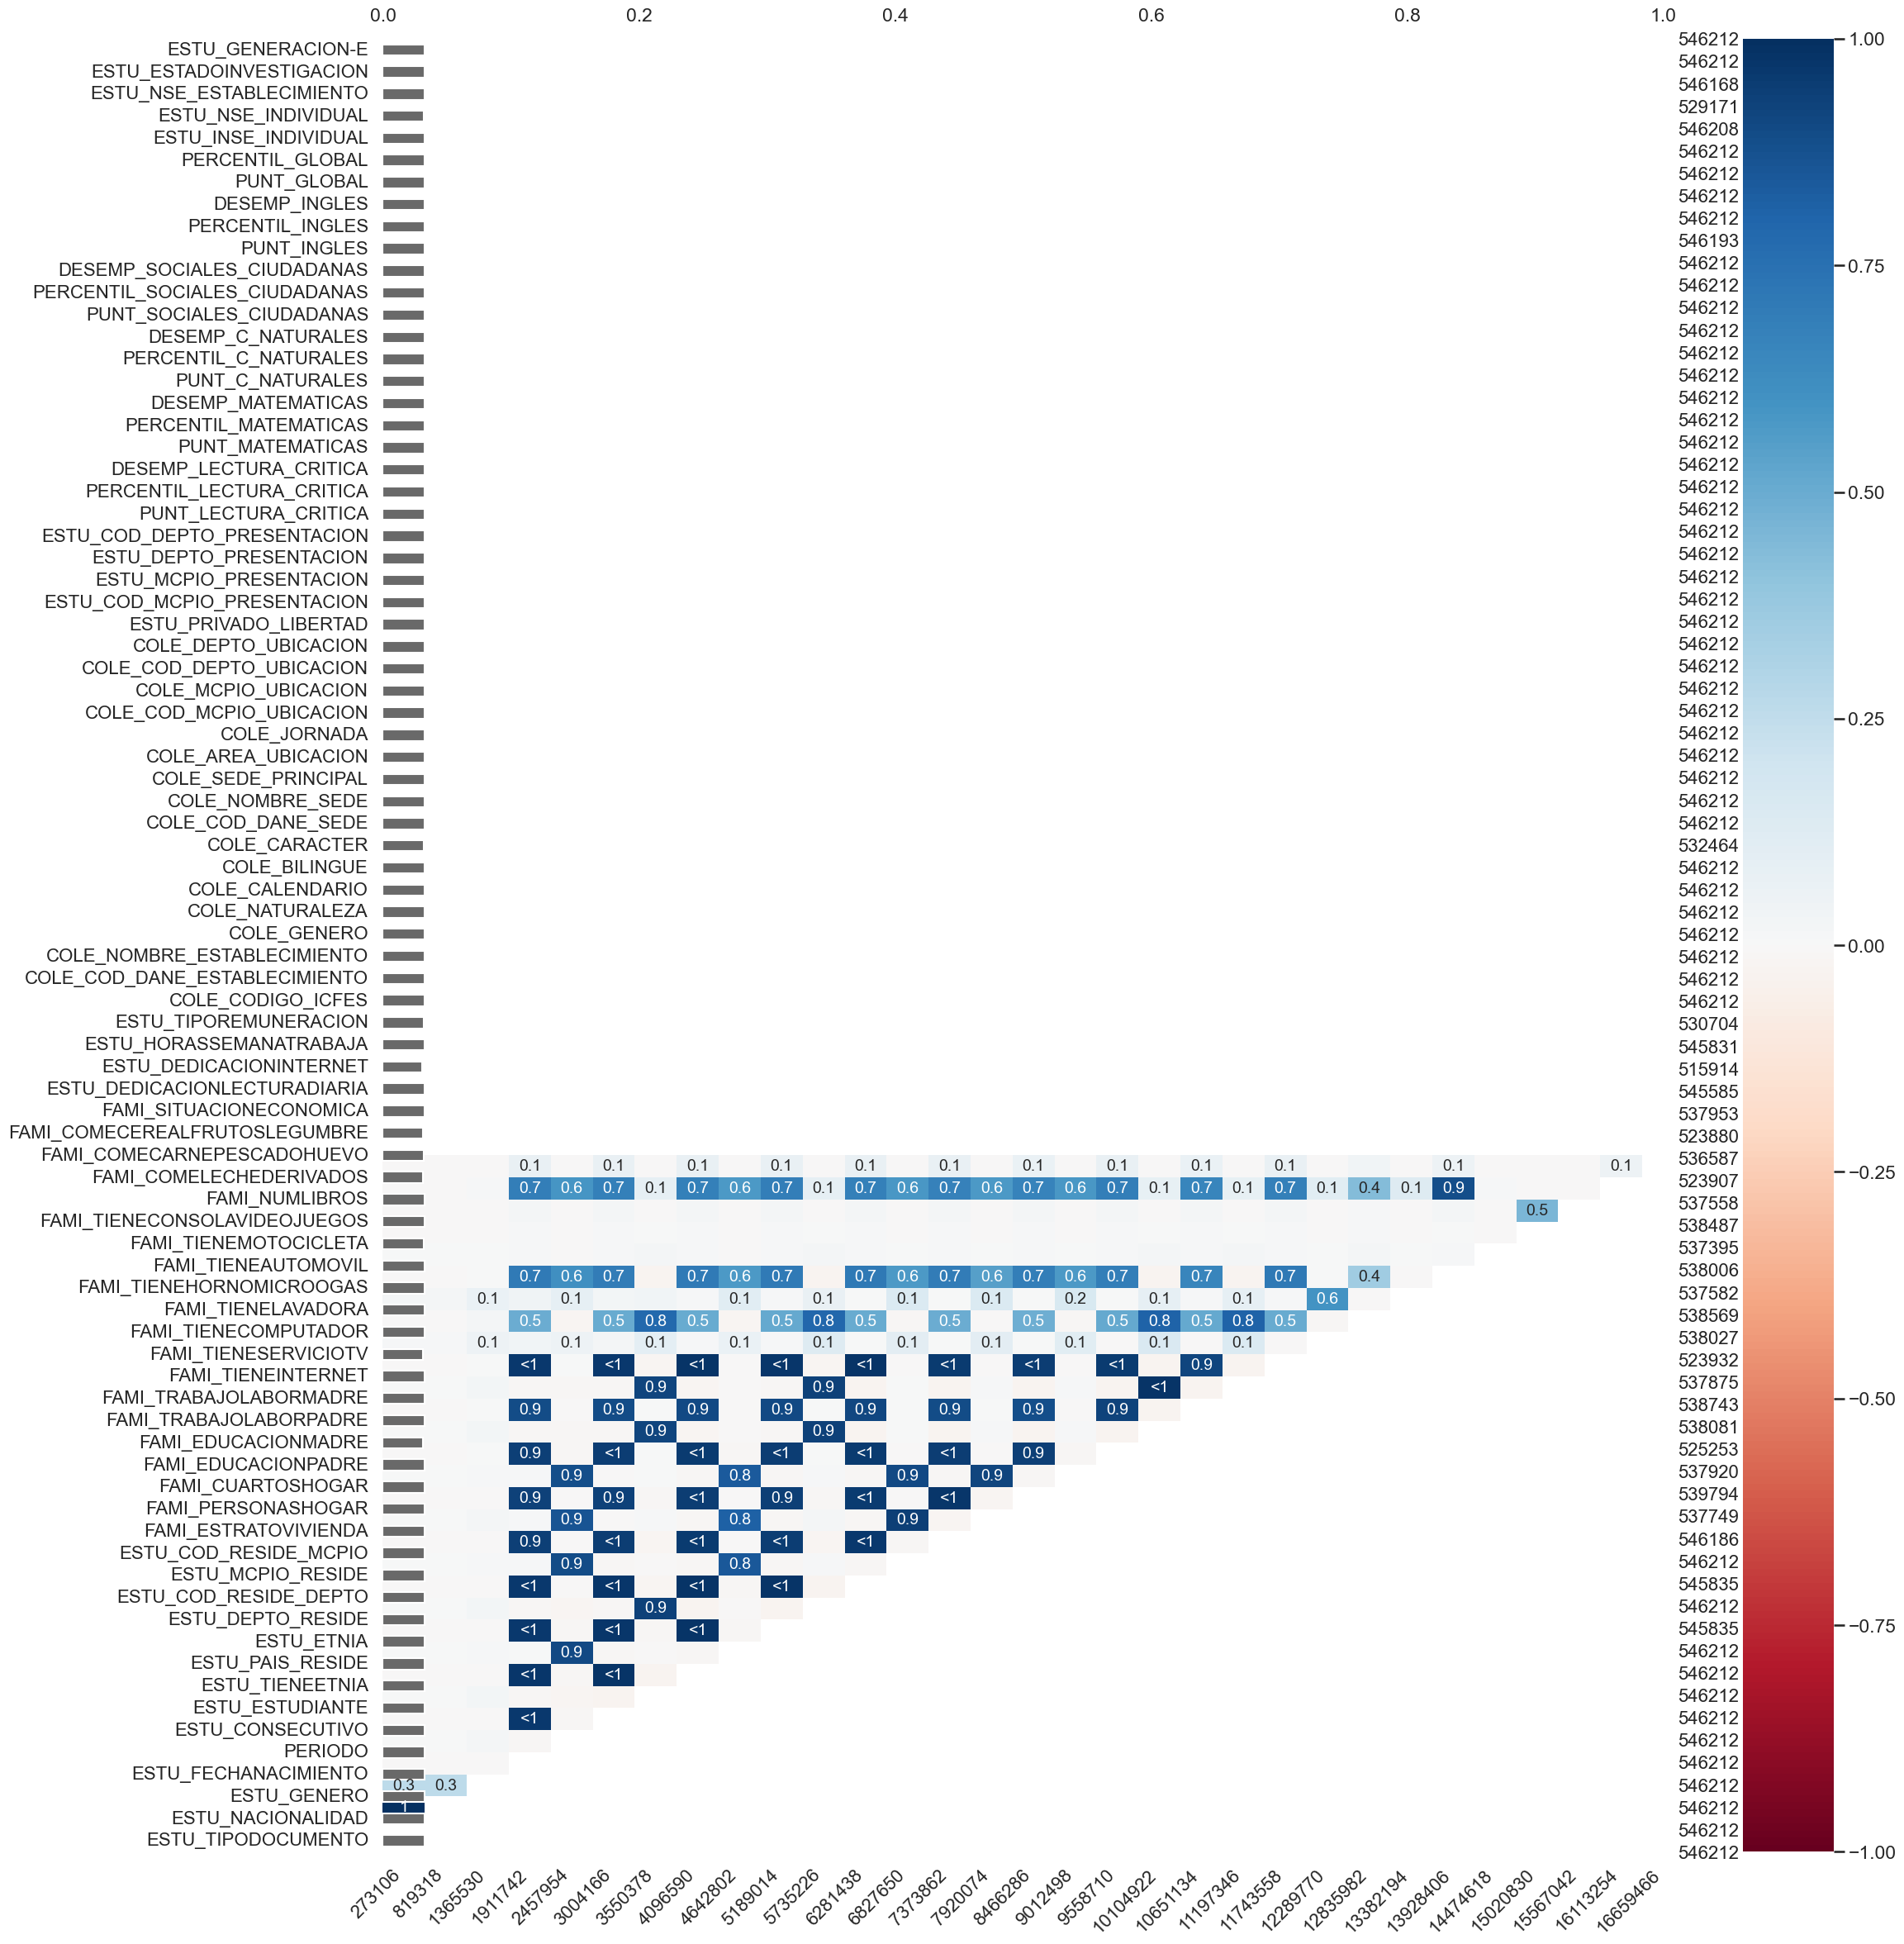

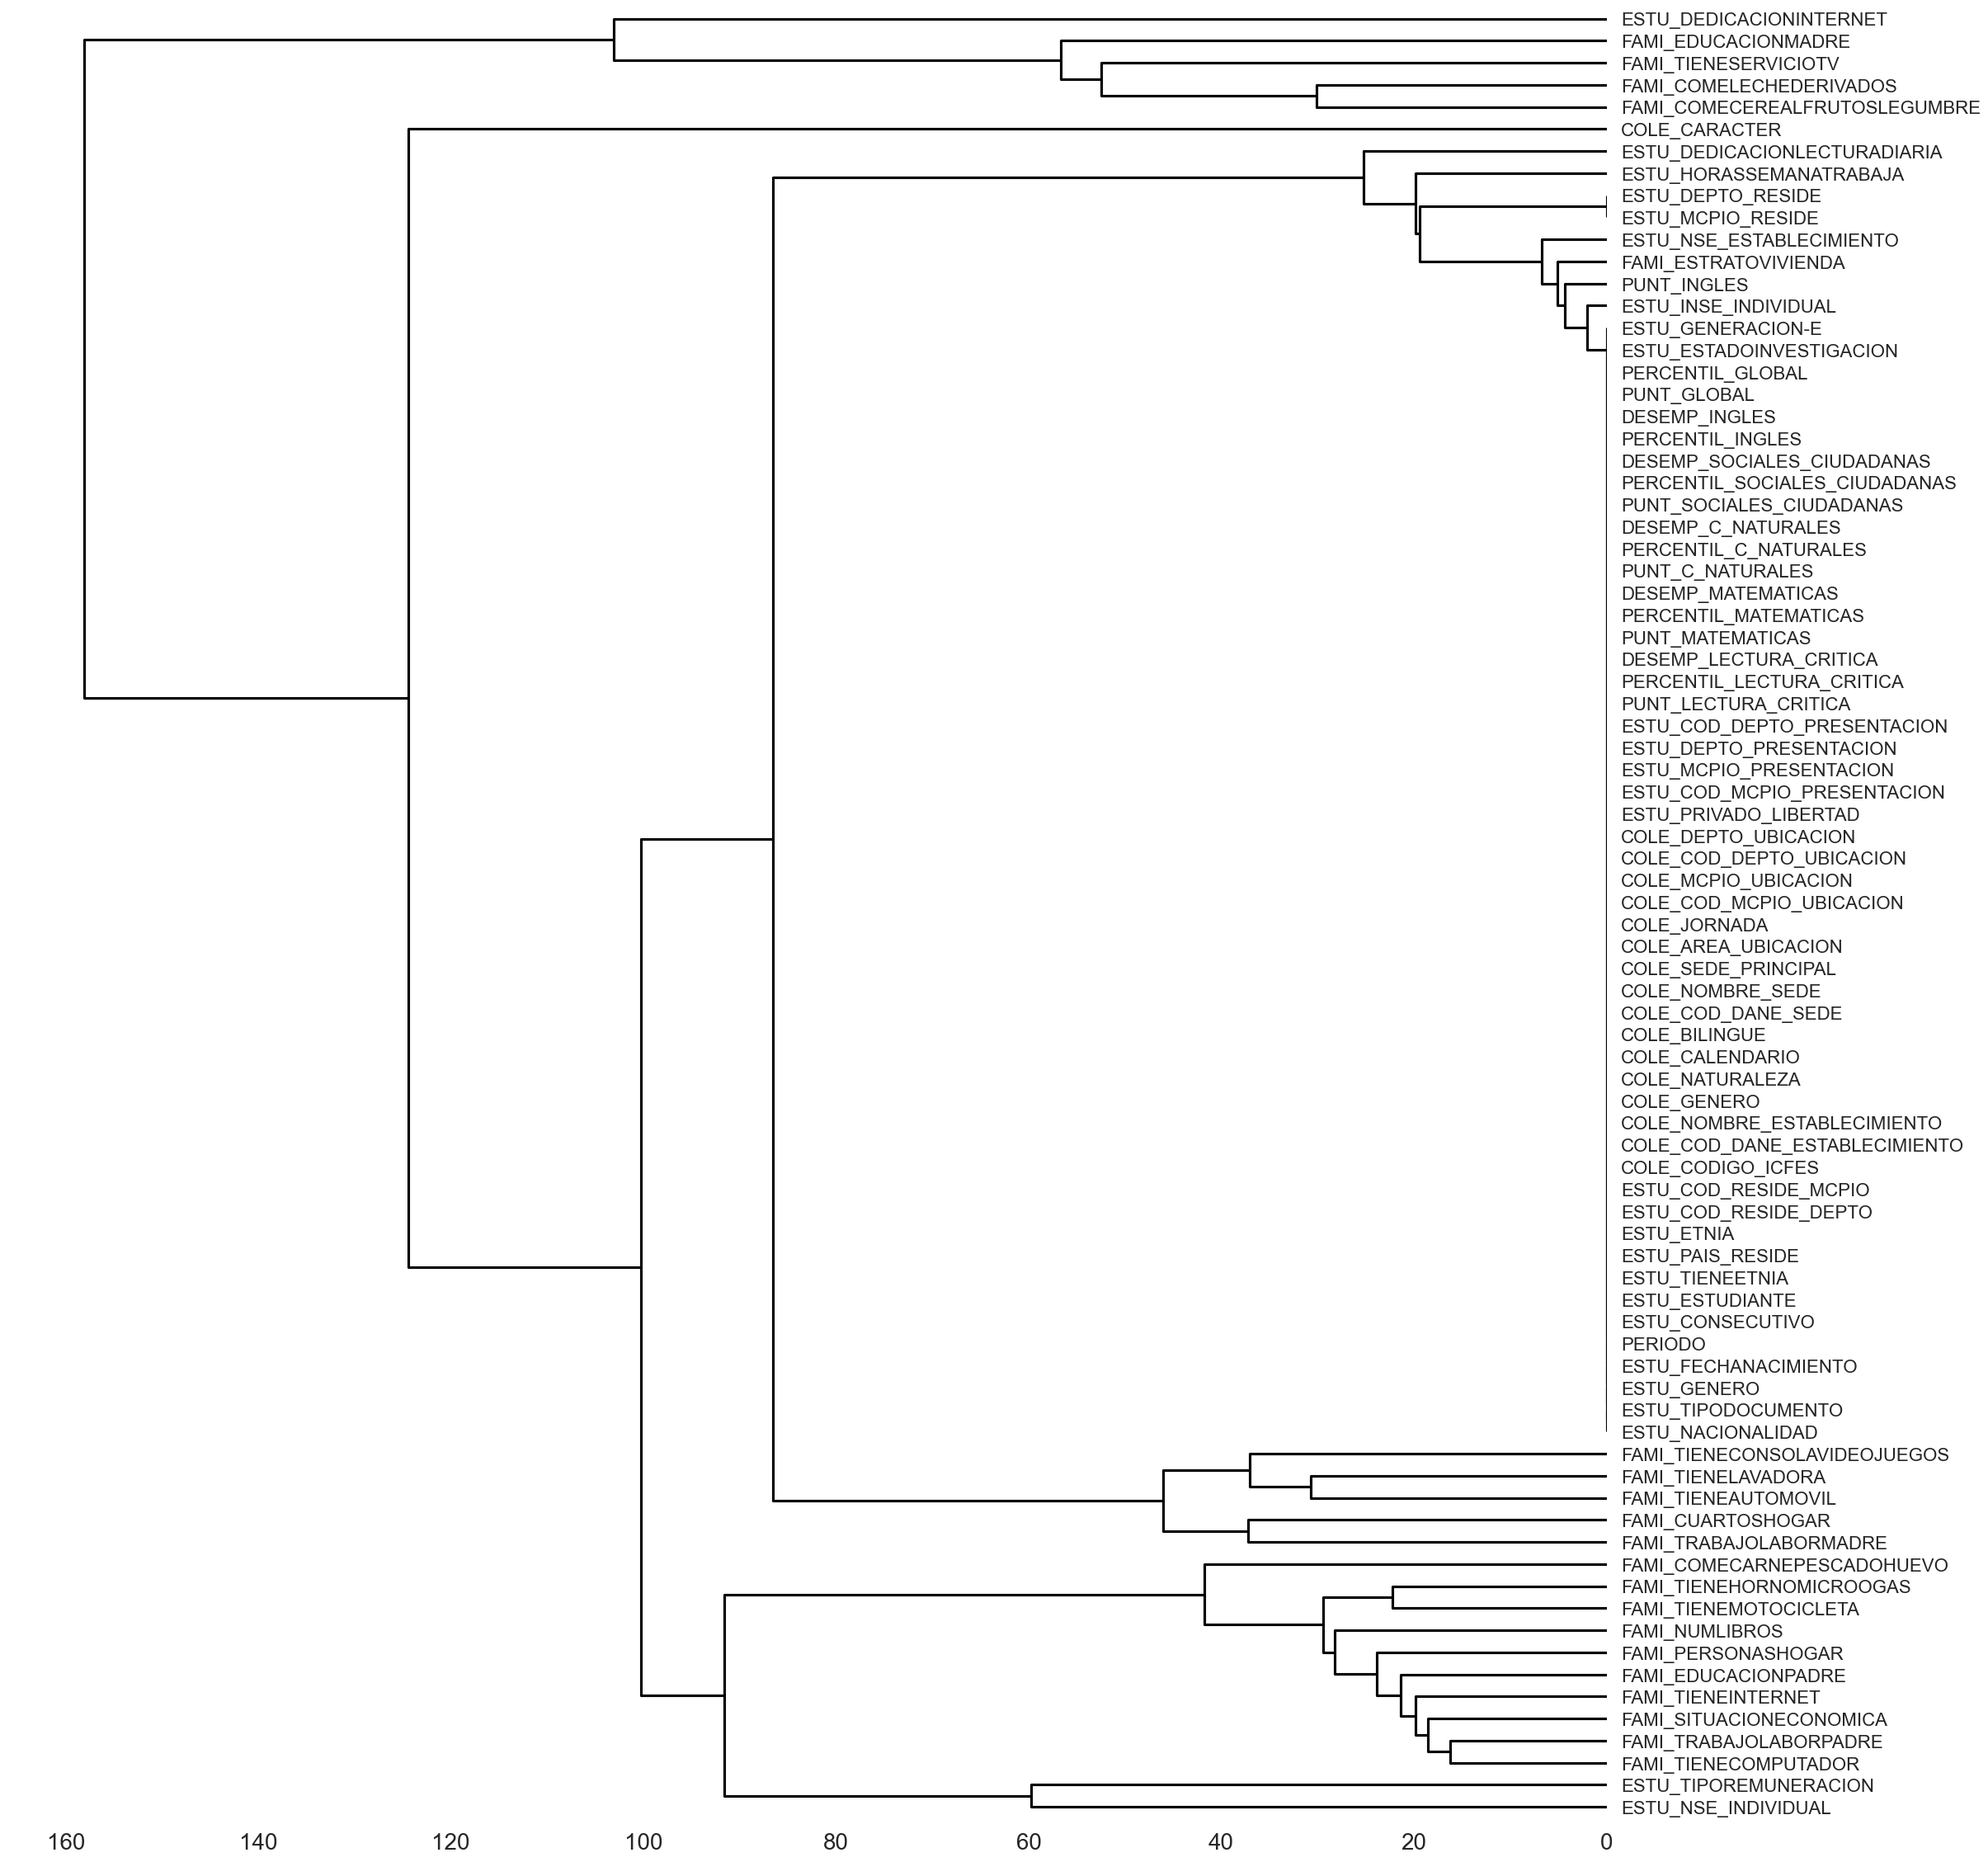

In [113]:
import missingno as msno

# Mapa de calor de correlación de NAs
msno.heatmap(icfes)

# Gráfico de barras por variable
msno.bar(icfes)

# Dendrograma para ver patrones de NA compartidos
msno.dendrogram(icfes)


In [114]:
# Conteo de NA por fila
row_na = icfes.isna().sum(axis=1)

# Filas con más del 50% de NA
incompletas = icfes[row_na > (icfes.shape[1] / 2)]
print(incompletas.shape)

(0, 82)


In [115]:
import pandas as pd

# Matriz de correlación de NAs
na_corr = icfes.isna().corr()

# Umbral de correlación (ajústalo si quieres ser más estricto o más laxo)
threshold = 0.8

# Para guardar los grupos
clusters = []
visited = set()

for col in na_corr.columns:
    if col not in visited:
        # Encuentra todas las variables correlacionadas con 'col' >= threshold
        correlated = na_corr.index[na_corr[col] >= threshold].tolist()
        
        # Si hay más de una variable, consideramos que forman grupo
        if len(correlated) > 1:
            clusters.append(correlated)
            visited.update(correlated)

# Mostrar resultados
for i, cluster in enumerate(clusters, 1):
    print(f"🔹 Grupo {i}: {cluster}")


🔹 Grupo 1: ['ESTU_DEPTO_RESIDE', 'ESTU_MCPIO_RESIDE']
🔹 Grupo 2: ['FAMI_PERSONASHOGAR', 'FAMI_EDUCACIONPADRE', 'FAMI_TRABAJOLABORPADRE', 'FAMI_TIENEINTERNET', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENEMOTOCICLETA', 'FAMI_NUMLIBROS', 'FAMI_COMECARNEPESCADOHUEVO', 'FAMI_SITUACIONECONOMICA']
🔹 Grupo 3: ['FAMI_CUARTOSHOGAR', 'FAMI_TRABAJOLABORMADRE', 'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENECONSOLAVIDEOJUEGOS']
🔹 Grupo 4: ['FAMI_EDUCACIONMADRE', 'FAMI_TIENESERVICIOTV', 'FAMI_COMELECHEDERIVADOS', 'FAMI_COMECEREALFRUTOSLEGUMBRE']
🔹 Grupo 5: ['FAMI_COMELECHEDERIVADOS', 'FAMI_COMECEREALFRUTOSLEGUMBRE', 'ESTU_DEDICACIONINTERNET']
🔹 Grupo 6: ['ESTU_TIPOREMUNERACION', 'ESTU_NSE_INDIVIDUAL']


In [116]:
num_vars = icfes.select_dtypes(include=["int64", "float64"])
print("Variables numéricas:", num_vars.columns.tolist())

Variables numéricas: ['PERIODO', 'COLE_CODIGO_ICFES', 'COLE_COD_MCPIO_UBICACION', 'COLE_COD_DEPTO_UBICACION', 'ESTU_COD_MCPIO_PRESENTACION', 'ESTU_COD_DEPTO_PRESENTACION', 'PUNT_LECTURA_CRITICA', 'PERCENTIL_LECTURA_CRITICA', 'DESEMP_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PERCENTIL_MATEMATICAS', 'DESEMP_MATEMATICAS', 'PUNT_C_NATURALES', 'PERCENTIL_C_NATURALES', 'DESEMP_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PERCENTIL_SOCIALES_CIUDADANAS', 'DESEMP_SOCIALES_CIUDADANAS', 'PUNT_INGLES', 'PERCENTIL_INGLES', 'PUNT_GLOBAL', 'ESTU_NSE_ESTABLECIMIENTO']


### 4. CARDINALIDAD DE VARIABLES CATEGÓRICAS

In [117]:
# Filtrar variables categóricas
cat_vars = icfes.select_dtypes(include=['object'])

# Número de categorías únicas por variable
cardinalidad = cat_vars.nunique().sort_values(ascending=False)
print(cardinalidad)

ESTU_CONSECUTIVO                 546212
ESTU_INSE_INDIVIDUAL             469865
ESTU_FECHANACIMIENTO              11663
COLE_NOMBRE_SEDE                  10284
COLE_NOMBRE_ESTABLECIMIENTO        9372
ESTU_COD_RESIDE_MCPIO              1115
ESTU_MCPIO_RESIDE                  1031
COLE_MCPIO_UBICACION               1030
ESTU_MCPIO_PRESENTACION             472
COLE_COD_DANE_SEDE                  234
COLE_COD_DANE_ESTABLECIMIENTO       232
PERCENTIL_GLOBAL                    101
ESTU_COD_RESIDE_DEPTO                35
ESTU_DEPTO_RESIDE                    34
ESTU_NACIONALIDAD                    33
ESTU_PAIS_RESIDE                     33
ESTU_DEPTO_PRESENTACION              33
COLE_DEPTO_UBICACION                 33
ESTU_ETNIA                           21
FAMI_TRABAJOLABORMADRE               14
FAMI_TRABAJOLABORPADRE               14
FAMI_EDUCACIONMADRE                  13
FAMI_EDUCACIONPADRE                  13
ESTU_TIPODOCUMENTO                   10
FAMI_ESTRATOVIVIENDA                  8


In [118]:
for col in cat_vars.columns:
    print(f"\n📌 {col} ({cat_vars[col].nunique()} categorías)")
    print(cat_vars[col].value_counts().head(5))  # top 5 categorías



📌 ESTU_TIPODOCUMENTO (10 categorías)
ESTU_TIPODOCUMENTO
TI     445780
CC      91921
CR       6123
CE       1225
NES       822
Name: count, dtype: int64

📌 ESTU_NACIONALIDAD (33 categorías)
ESTU_NACIONALIDAD
COLOMBIA          544918
VENEZUELA           1109
ESTADOS UNIDOS        52
ESPAÑA                33
ECUADOR               26
Name: count, dtype: int64

📌 ESTU_GENERO (3 categorías)
ESTU_GENERO
F    295994
M    250097
-       121
Name: count, dtype: int64

📌 ESTU_FECHANACIMIENTO (11663 categorías)
ESTU_FECHANACIMIENTO
1/01/1900     1826
20/09/2002     866
17/09/2002     859
13/09/2002     851
24/09/2002     850
Name: count, dtype: int64

📌 ESTU_CONSECUTIVO (546212 categorías)
ESTU_CONSECUTIVO
SB11201940074679    1
SB11201940031558    1
SB11201940303339    1
SB11201940255017    1
SB11201940271799    1
Name: count, dtype: int64

📌 ESTU_ESTUDIANTE (1 categorías)
ESTU_ESTUDIANTE
ESTUDIANTE    546212
Name: count, dtype: int64

📌 ESTU_TIENEETNIA (3 categorías)
ESTU_TIENEETNIA
No    506074

In [119]:
import numpy as np

# Extraer variable
y = icfes['PUNT_GLOBAL'].dropna()

# Normalización (Z-score)
mu, sigma = y.mean(), y.std()
z_scores = (y - mu) / sigma

In [120]:
# Índices de los outliers
outlier_idx = y.index[abs(z_scores) > 3]

# Guardar como lista de tuplas (índice, valor, z-score)
outliers = [(i, y.loc[i], z_scores.loc[i]) for i in outlier_idx]

print("Número de outliers:", len(outliers))
print("Ejemplo:", outliers[:5])


Número de outliers: 588
Ejemplo: [(316, np.int64(80), np.float64(-3.2340265926888967)), (684, np.int64(90), np.float64(-3.039424306174579)), (3653, np.int64(403), np.float64(3.051627261723554)), (5023, np.int64(416), np.float64(3.3046102341921664)), (6411, np.int64(411), np.float64(3.207309090935008))]


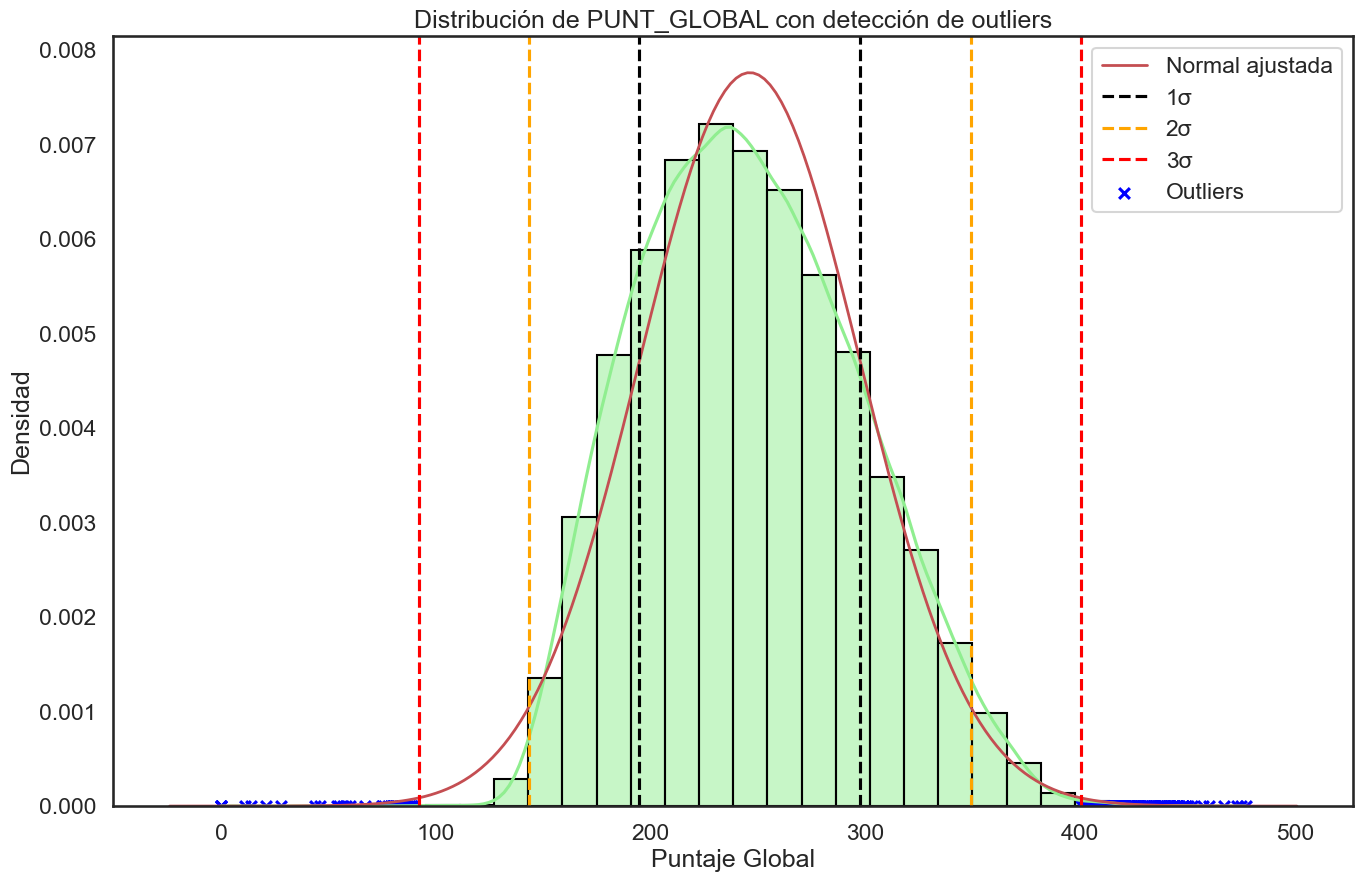

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

plt.figure(figsize=(16,10))

# Histograma con KDE
sns.histplot(y, kde=True, stat="density", bins=30, color="lightgreen", edgecolor="black")

# Curva normal teórica
xmin, xmax = plt.xlim()
xx = np.linspace(xmin, xmax, 200)
plt.plot(xx, norm.pdf(xx, mu, sigma), 'r', lw=2, label="Normal ajustada")

# Líneas verticales de 1σ, 2σ, 3σ
for k, col in zip([1,2,3], ["black","orange","red"]):
    plt.axvline(mu + k*sigma, color=col, linestyle="--")
    plt.axvline(mu - k*sigma, color=col, linestyle="--", label=f"{k}σ")

# Graficar puntos outliers
plt.scatter(y.loc[outlier_idx], [0]*len(outlier_idx), 
            color="blue", marker="x", s=60, label="Outliers")

plt.title("Distribución de PUNT_GLOBAL con detección de outliers")
plt.xlabel("Puntaje Global")
plt.ylabel("Densidad")
plt.legend()
plt.show()


### 5. CONSISTENCIA DEL FORMATO DE DATOS

In [122]:
for col in icfes.select_dtypes(include=["int64", "float64"]).columns:
    n_unique = icfes[col].nunique()
    if n_unique < 20:  # arbitrario, pocos valores únicos
        print(f"⚠️ {col} es numérica pero parece categórica ({n_unique} valores únicos)")


⚠️ PERIODO es numérica pero parece categórica (1 valores únicos)
⚠️ DESEMP_LECTURA_CRITICA es numérica pero parece categórica (4 valores únicos)
⚠️ DESEMP_MATEMATICAS es numérica pero parece categórica (4 valores únicos)
⚠️ DESEMP_C_NATURALES es numérica pero parece categórica (4 valores únicos)
⚠️ DESEMP_SOCIALES_CIUDADANAS es numérica pero parece categórica (4 valores únicos)
⚠️ ESTU_NSE_ESTABLECIMIENTO es numérica pero parece categórica (4 valores únicos)


In [123]:
import pandas as pd
import numpy as np
from collections import Counter

# Función para identificar valores problemáticos en columnas que deberían ser numéricas
def identificar_inconsistencias_numericas(df, columnas=None):
    """
    Identifica valores no numéricos en columnas que podrían ser numéricas
    """
    if columnas is None:
        columnas = df.select_dtypes(include=["object"]).columns
    
    resultados = {}
    
    for col in columnas:
        print(f"\n{'='*50}")
        print(f"ANALIZANDO COLUMNA: {col}")
        print(f"{'='*50}")
        
        # Valores únicos
        valores_unicos = df[col].unique()
        print(f"Valores únicos: {len(valores_unicos)}")
        
        # Separar valores que se pueden convertir a numérico de los que no
        valores_numericos = []
        valores_problematicos = []
        
        for valor in valores_unicos:
            if pd.isna(valor):  # NaN
                continue
            try:
                float(str(valor).strip())
                valores_numericos.append(valor)
            except (ValueError, TypeError):
                valores_problematicos.append(valor)
        
        print(f"Valores numéricos: {len(valores_numericos)}")
        print(f"Valores problemáticos: {len(valores_problematicos)}")
        
        if valores_problematicos:
            print(f"\n⚠️  VALORES PROBLEMÁTICOS ENCONTRADOS:")
            conteo_problematicos = df[col].value_counts()
            for valor in valores_problematicos:
                frecuencia = conteo_problematicos.get(valor, 0)
                print(f"  '{valor}' (tipo: {type(valor).__name__}) - Aparece {frecuencia} veces")
        
        if valores_numericos:
            print(f"\n✅ Valores numéricos encontrados:")
            print(f"  Rango: {min(valores_numericos)} - {max(valores_numericos)}")
        
        # Intentar conversión con diferentes estrategias
        print(f"\n🔍 ESTRATEGIAS DE CONVERSIÓN:")
        
        # Estrategia 1: Conversión directa
        try:
            convertidos = pd.to_numeric(df[col], errors='coerce')
            nans_originales = df[col].isna().sum()
            nans_despues = convertidos.isna().sum()
            print(f"  1. Conversión directa: {nans_despues - nans_originales} valores se volvieron NaN")
        except Exception as e:
            print(f"  1. Error en conversión directa: {e}")
        
        # Estrategia 2: Limpiar espacios y caracteres especiales
        try:
            limpiado = df[col].astype(str).str.strip()
            convertidos_limpio = pd.to_numeric(limpiado, errors='coerce')
            nans_limpio = convertidos_limpio.isna().sum()
            print(f"  2. Limpiando espacios: {nans_limpio - nans_originales} valores se volvieron NaN")
        except Exception as e:
            print(f"  2. Error limpiando espacios: {e}")
        
        # Estrategia 3: Reemplazar valores específicos
        try:
            reemplazado = df[col].replace(['-', '--', '?', 'N/A', 'n/a'], np.nan)
            convertidos_reemplazado = pd.to_numeric(reemplazado, errors='coerce')
            nans_reemplazado = convertidos_reemplazado.isna().sum()
            print(f"  3. Reemplazando valores especiales: {nans_reemplazado - nans_originales} valores se volvieron NaN")
        except Exception as e:
            print(f"  3. Error reemplazando valores: {e}")
        
        resultados[col] = {
            'valores_unicos': len(valores_unicos),
            'valores_numericos': valores_numericos,
            'valores_problematicos': valores_problematicos,
            'total_registros': len(df),
            'nans_originales': df[col].isna().sum()
        }
    
    return resultados

# Función específica para encontrar patrones raros
def encontrar_patrones_raros(df, columna):
    """
    Encuentra patrones específicos en una columna
    """
    print(f"\n🔍 PATRONES ESPECÍFICOS EN '{columna}':")
    
    valores = df[columna].dropna().astype(str)
    
    # Patrones comunes de valores problemáticos
    patrones = {
        'guiones': valores.str.contains(r'^-+$', regex=True).sum(),
        'solo_espacios': valores.str.strip().eq('').sum(),
        'caracteres_especiales': valores.str.contains(r'[^\w\s\.]', regex=True).sum(),
        'muy_largos': (valores.str.len() > 10).sum(),
        'contienen_letras': valores.str.contains(r'[a-zA-Z]', regex=True).sum(),
        'multiples_puntos': valores.str.contains(r'\..*\.', regex=True).sum(),
    }
    
    for patron, count in patrones.items():
        if count > 0:
            print(f"  {patron}: {count} casos")

# Función para generar reporte completo
def reporte_inconsistencias_completo(df):
    """
    Genera un reporte completo de inconsistencias
    """
    print("🚀 INICIANDO ANÁLISIS DE INCONSISTENCIAS EN DATOS ICFES")
    print("="*70)
    
    # Información general del dataset
    print(f"📊 INFORMACIÓN GENERAL:")
    print(f"  Dimensiones: {df.shape}")
    print(f"  Columnas objeto: {len(df.select_dtypes(include=['object']).columns)}")
    print(f"  Memoria utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    # Buscar columnas sospechosas de ser numéricas
    columnas_objeto = df.select_dtypes(include=["object"]).columns
    columnas_sospechosas = []
    
    for col in columnas_objeto:
        # Si la mayoría de valores únicos son números pequeños, es sospechoso
        valores_unicos = df[col].dropna().unique()
        if len(valores_unicos) < 20:  # Pocas categorías
            try:
                numericos = [float(str(v).strip()) for v in valores_unicos if str(v).strip() not in ['-', '--', '?', 'N/A', 'n/a']]
                if len(numericos) > len(valores_unicos) * 0.7:  # Más del 70% son numéricos
                    columnas_sospechosas.append(col)
            except:
                pass
    
    print(f"\n🎯 COLUMNAS SOSPECHOSAS DE SER NUMÉRICAS:")
    print(f"  {columnas_sospechosas}")
    
    # Análizar cada columna sospechosa
    resultados = identificar_inconsistencias_numericas(df, columnas_sospechosas)
    
    return resultados

In [124]:
# EJEMPLO DE USO:
resultados = reporte_inconsistencias_completo(icfes)

🚀 INICIANDO ANÁLISIS DE INCONSISTENCIAS EN DATOS ICFES
📊 INFORMACIÓN GENERAL:
  Dimensiones: (546212, 82)
  Columnas objeto: 60
  Memoria utilizada: 2025.79 MB

🎯 COLUMNAS SOSPECHOSAS DE SER NUMÉRICAS:
  ['ESTU_NSE_INDIVIDUAL']

ANALIZANDO COLUMNA: ESTU_NSE_INDIVIDUAL
Valores únicos: 6
Valores numéricos: 4
Valores problemáticos: 1

⚠️  VALORES PROBLEMÁTICOS ENCONTRADOS:
  '-' (tipo: str) - Aparece 4 veces

✅ Valores numéricos encontrados:
  Rango: 1 - 4

🔍 ESTRATEGIAS DE CONVERSIÓN:
  1. Conversión directa: 4 valores se volvieron NaN
  2. Limpiando espacios: 4 valores se volvieron NaN
  3. Reemplazando valores especiales: 4 valores se volvieron NaN


# 2. LIMPIEZA DE DATOS

## 

1. **Renombrar y eliminar variables**
2. **Estandarizar la escritura de las categorías**
3. **Normalización variable categórica**: Unificar niveles similares (ej: "Si"/"Sí"/"YES" → "Si")
4. **Tratamiento de variables categóricas de alta cardinalidad**: Agrupar categorías poco frecuentes o similares
5. **Validación y corrección de tipos de datos**: Asegurar que variables numéricas no estén como texto
6. **Eliminación de registros duplicados**: Identificar y manejar duplicados exactos
7. **Validación de integridad para variable objetivo**: Asegurar valores consistentes, lógicos y dentro de rangos esperados
8. **Eliminacion de Filas con muchos NA**: Verificar la cantidad de NA tolerables por filas reduciendo la cantidad de filas perdidas pensando en una imputación futura

## 1. ELIMINAR VARIABLES INÚTILES

In [125]:
eliminar_col = ["PERIODO", "ESTU_TIPODOCUMENTO", "COLE_NOMBRE_ESTABLECIMIENTO", "ESTU_CONSECUTIVO", 'ESTU_PAIS_RESIDE', 
               "ESTU_ESTUDIANTE", "ESTU_COD_RESIDE_DEPTO", "ESTU_COD_RESIDE_MCPIO", "COLE_CODIGO_ICFES", 'COLE_BILINGUE', 
               "COLE_COD_DANE_ESTABLECIMIENTO", "COLE_COD_DANE_SEDE", "COLE_COD_MCPIO_UBICACION", 'COLE_CARACTER',
               "COLE_COD_DEPTO_UBICACION","ESTU_COD_DEPTO_PRESENTACION","ESTU_COD_DEPTO_PRESENTACION", 'ESTU_PRIVADO_LIBERTAD',
               "COLE_NOMBRE_SEDE", "ESTU_COD_MCPIO_PRESENTACION", "ESTU_ESTADOINVESTIGACION", "ESTU_GENERACION-E"]

icfes = icfes.drop(columns=eliminar_col)

### 1.1 RENOMBRAR VARIABLES

In [126]:
### Renombramos las variables
icfes.columns = ["nacionalidad", "genero", "fecha_nac", "pertenece_etnia", "etnia_estudiante", "dpto_est_reside", 
                 "mpio_est_reside", "estrato_casa", "num_personas_casa", "num_cuartos_casa", "nivel_edu_padre", 
                 "nivel_edu_madre", "actividad_madre", "actividad_padre", "internet", "tv", "computador", "lavadora", 
                 "microndas", "carro", "moto", "consola", "num_libros", "freq_leche_derivados", "freq_carne_pescado_similares",
                 "freq_cereales_frutos_legumbres", "situacion_economica_casa", "tiempo_lectura", "tiempo_internet", 
                 "horas_trabajo_semanal", "tipo_remuneracion", "colegio_genero", "colegio_naturaleza", "colegio_calendario", 
                 "colegio_caracter", "colegio_area", "colegio_jornada", "colegio_mpio", "colegio_dpto", 
                 "est_mpio_presento_examen", "est_dpto_presento_examen", "puntaje_lectura", "percentil_lectura", 
                 "nivel_lectura", "puntaje_matematicas", "percentil_matematicas", "nivel_matematicas", "puntaje_naturales", 
                 "percentil_naturales", "nivel_naturales", "puntaje_sociales", "percentil_sociales", "nivel_sociales", 
                 "puntaje_ingles", "percentil_ingles", "nivel_ingles", "puntaje_global", "percentil_global", "inse_estudiante", 
                 "nse_estudiante", "nse_colegio"]

icfes.head(4)

,nacionalidad,genero,fecha_nac,pertenece_etnia,etnia_estudiante,dpto_est_reside,mpio_est_reside,estrato_casa,num_personas_casa,num_cuartos_casa,nivel_edu_padre,nivel_edu_madre,actividad_madre,actividad_padre,internet,tv,computador,lavadora,microndas,carro,moto,consola,num_libros,freq_leche_derivados,freq_carne_pescado_similares,freq_cereales_frutos_legumbres,situacion_economica_casa,tiempo_lectura,tiempo_internet,horas_trabajo_semanal,tipo_remuneracion,colegio_genero,colegio_naturaleza,colegio_calendario,colegio_caracter,colegio_area,colegio_jornada,colegio_mpio,colegio_dpto,est_mpio_presento_examen,est_dpto_presento_examen,puntaje_lectura,percentil_lectura,nivel_lectura,puntaje_matematicas,percentil_matematicas,nivel_matematicas,puntaje_naturales,percentil_naturales,nivel_naturales,puntaje_sociales,percentil_sociales,nivel_sociales,puntaje_ingles,percentil_ingles,nivel_ingles,puntaje_global,percentil_global,inse_estudiante,nse_estudiante,nse_colegio
0,COLOMBIA,M,18/02/2002,No,-,MAGDALENA,SANTA ANA,Estrato 3,5 a 6,Cinco,Educación profesional completa,Secundaria (Bachillerato) completa,No aplica,"Trabaja en el hogar, no trabaja o estudia",Si,Si,No,Si,Si,No,No,No,MÁS DE 100 LIBROS,1 o 2 veces por semana,3 a 5 veces por semana,Nunca o rara vez comemos eso,Peor,Entre 30 y 60 minutos,Entre 30 y 60 minutos,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,S,URBANO,MAÑANA,SANTA ANA,MAGDALENA,SANTA ANA,MAGDALENA,47,33,2,48,42,2,37,15,1,30,8,1,54.00,67,A1,208,25,509.421.557.404.314,2,2.00
1,COLOMBIA,M,28/06/2003,No,-,BOGOTÁ,BOGOTÁ D.C.,Estrato 3,9 o más,Tres,Técnica o tecnológica completa,Técnica o tecnológica completa,Trabaja por cuenta propia (por ejemplo plomero...,Es dueño de un negocio pequeño (tiene pocos em...,Si,Si,Si,Si,Si,Si,No,No,MÁS DE 100 LIBROS,Todos o casi todos los días,3 a 5 veces por semana,1 o 2 veces por semana,Mejor,Entre 30 y 60 minutos,Entre 30 y 60 minutos,Menos de 10 horas,"Si, en efectivo",MIXTO,NO OFICIAL,A,S,URBANO,COMPLETA,BOGOTÁ D.C.,BOGOTÁ,BOGOTÁ D.C.,BOGOTÁ,60,76,3,65,88,3,54,71,2,59,83,3,63.00,88,A2,299,83,59.767.864.431.576,3,4.00
2,COLOMBIA,M,2/06/2001,No,-,BOLIVAR,CARTAGENA DE INDIAS,Estrato 1,5 a 6,Dos,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Es vendedor o trabaja en atención al público,Es vendedor o trabaja en atención al público,No,Si,No,Si,No,No,No,No,26 A 100 LIBROS,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual,Entre 30 y 60 minutos,Más de 3 horas,0,"Si, en efectivo",MIXTO,OFICIAL,A,S,URBANO,MAÑANA,CARTAGENA DE INDIAS,BOLIVAR,CARTAGENA DE INDIAS,BOLIVAR,66,91,4,57,70,3,41,29,2,74,99,4,64.00,89,A2,299,84,507.642.383.644.749,2,3.00
3,COLOMBIA,M,26/04/2002,Si,Ninguno,BOGOTÁ,BOGOTÁ D.C.,Estrato 3,3 a 4,Dos,Primaria incompleta,Secundaria (Bachillerato) completa,No aplica,Es dueño de un negocio pequeño (tiene pocos em...,No,No,Si,No,No,No,No,No,11 A 25 LIBROS,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual,30 minutos o menos,Entre 30 y 60 minutos,Más de 30 horas,"Si, en efectivo",MIXTO,OFICIAL,A,S,URBANO,MAÑANA,BOGOTÁ D.C.,BOGOTÁ,BOGOTÁ D.C.,BOGOTÁ,62,81,3,54,60,3,61,87,3,73,99,4,53.00,67,A1,309,88,457.791.353.123.516,2,3.00


## 2. ESTANDARIZAR CATEGORÍAS DE VARIABLES

In [127]:
nom_propio_cat = ["nacionalidad", "dpto_est_reside", "mpio_est_reside", "num_libros", "colegio_genero", "colegio_naturaleza",
                  "colegio_caracter", "colegio_area", "colegio_jornada", "colegio_mpio", "colegio_dpto", "est_mpio_presento_examen", 
                  "est_dpto_presento_examen"]

icfes[nom_propio_cat] = icfes[nom_propio_cat].apply(lambda x: x.str.title() if x.dtype == "object" else x)
icfes.head(4)

,nacionalidad,genero,fecha_nac,pertenece_etnia,etnia_estudiante,dpto_est_reside,mpio_est_reside,estrato_casa,num_personas_casa,num_cuartos_casa,nivel_edu_padre,nivel_edu_madre,actividad_madre,actividad_padre,internet,tv,computador,lavadora,microndas,carro,moto,consola,num_libros,freq_leche_derivados,freq_carne_pescado_similares,freq_cereales_frutos_legumbres,situacion_economica_casa,tiempo_lectura,tiempo_internet,horas_trabajo_semanal,tipo_remuneracion,colegio_genero,colegio_naturaleza,colegio_calendario,colegio_caracter,colegio_area,colegio_jornada,colegio_mpio,colegio_dpto,est_mpio_presento_examen,est_dpto_presento_examen,puntaje_lectura,percentil_lectura,nivel_lectura,puntaje_matematicas,percentil_matematicas,nivel_matematicas,puntaje_naturales,percentil_naturales,nivel_naturales,puntaje_sociales,percentil_sociales,nivel_sociales,puntaje_ingles,percentil_ingles,nivel_ingles,puntaje_global,percentil_global,inse_estudiante,nse_estudiante,nse_colegio
0,Colombia,M,18/02/2002,No,-,Magdalena,Santa Ana,Estrato 3,5 a 6,Cinco,Educación profesional completa,Secundaria (Bachillerato) completa,No aplica,"Trabaja en el hogar, no trabaja o estudia",Si,Si,No,Si,Si,No,No,No,Más De 100 Libros,1 o 2 veces por semana,3 a 5 veces por semana,Nunca o rara vez comemos eso,Peor,Entre 30 y 60 minutos,Entre 30 y 60 minutos,Menos de 10 horas,"Si, en efectivo",Mixto,Oficial,A,S,Urbano,Mañana,Santa Ana,Magdalena,Santa Ana,Magdalena,47,33,2,48,42,2,37,15,1,30,8,1,54.00,67,A1,208,25,509.421.557.404.314,2,2.00
1,Colombia,M,28/06/2003,No,-,Bogotá,Bogotá D.C.,Estrato 3,9 o más,Tres,Técnica o tecnológica completa,Técnica o tecnológica completa,Trabaja por cuenta propia (por ejemplo plomero...,Es dueño de un negocio pequeño (tiene pocos em...,Si,Si,Si,Si,Si,Si,No,No,Más De 100 Libros,Todos o casi todos los días,3 a 5 veces por semana,1 o 2 veces por semana,Mejor,Entre 30 y 60 minutos,Entre 30 y 60 minutos,Menos de 10 horas,"Si, en efectivo",Mixto,No Oficial,A,S,Urbano,Completa,Bogotá D.C.,Bogotá,Bogotá D.C.,Bogotá,60,76,3,65,88,3,54,71,2,59,83,3,63.00,88,A2,299,83,59.767.864.431.576,3,4.00
2,Colombia,M,2/06/2001,No,-,Bolivar,Cartagena De Indias,Estrato 1,5 a 6,Dos,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Es vendedor o trabaja en atención al público,Es vendedor o trabaja en atención al público,No,Si,No,Si,No,No,No,No,26 A 100 Libros,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual,Entre 30 y 60 minutos,Más de 3 horas,0,"Si, en efectivo",Mixto,Oficial,A,S,Urbano,Mañana,Cartagena De Indias,Bolivar,Cartagena De Indias,Bolivar,66,91,4,57,70,3,41,29,2,74,99,4,64.00,89,A2,299,84,507.642.383.644.749,2,3.00
3,Colombia,M,26/04/2002,Si,Ninguno,Bogotá,Bogotá D.C.,Estrato 3,3 a 4,Dos,Primaria incompleta,Secundaria (Bachillerato) completa,No aplica,Es dueño de un negocio pequeño (tiene pocos em...,No,No,Si,No,No,No,No,No,11 A 25 Libros,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual,30 minutos o menos,Entre 30 y 60 minutos,Más de 30 horas,"Si, en efectivo",Mixto,Oficial,A,S,Urbano,Mañana,Bogotá D.C.,Bogotá,Bogotá D.C.,Bogotá,62,81,3,54,60,3,61,87,3,73,99,4,53.00,67,A1,309,88,457.791.353.123.516,2,3.00


## 3. NORMALIZACIÓN DE VARIABLE CATEGÓRICA

### 3.1 REEMPLAZAR EL SÍMBOLO "-" POR VALORES NAN

In [128]:
### Cambiando el simbolo "-" por NaN para poder imputar después
# Lista para almacenar las columnas que contienen "-"
columnas_con_guion = [col for col in icfes.columns if "-" in icfes[col].astype(str).unique()]
print(columnas_con_guion)  # 🔍 Muestra las columnas que contienen "-"

for col in columnas_con_guion:
    icfes[col] = icfes[col].replace({"-": np.nan})

['genero', 'pertenece_etnia', 'etnia_estudiante', 'estrato_casa', 'num_personas_casa', 'num_cuartos_casa', 'nivel_edu_padre', 'nivel_edu_madre', 'actividad_madre', 'actividad_padre', 'internet', 'tv', 'computador', 'lavadora', 'microndas', 'carro', 'moto', 'consola', 'num_libros', 'freq_leche_derivados', 'freq_carne_pescado_similares', 'freq_cereales_frutos_legumbres', 'situacion_economica_casa', 'tiempo_lectura', 'tiempo_internet', 'horas_trabajo_semanal', 'tipo_remuneracion', 'percentil_global', 'inse_estudiante', 'nse_estudiante']


In [129]:
### Insertando NA's
icfes["genero"] = icfes["genero"].replace({'M': 'Masculino', 'F': 'Femenino'})

# Verificar los valores después del reemplazo
print(icfes["genero"].value_counts(dropna=False))  # Muestra también los NaN

genero
Femenino     295994
Masculino    250097
NaN             121
Name: count, dtype: int64


### 3.2 VARIABLES DEL ESTUDIANTE

In [130]:
icfes.sample(4)

,nacionalidad,genero,fecha_nac,pertenece_etnia,etnia_estudiante,dpto_est_reside,mpio_est_reside,estrato_casa,num_personas_casa,num_cuartos_casa,nivel_edu_padre,nivel_edu_madre,actividad_madre,actividad_padre,internet,tv,computador,lavadora,microndas,carro,moto,consola,num_libros,freq_leche_derivados,freq_carne_pescado_similares,freq_cereales_frutos_legumbres,situacion_economica_casa,tiempo_lectura,tiempo_internet,horas_trabajo_semanal,tipo_remuneracion,colegio_genero,colegio_naturaleza,colegio_calendario,colegio_caracter,colegio_area,colegio_jornada,colegio_mpio,colegio_dpto,est_mpio_presento_examen,est_dpto_presento_examen,puntaje_lectura,percentil_lectura,nivel_lectura,puntaje_matematicas,percentil_matematicas,nivel_matematicas,puntaje_naturales,percentil_naturales,nivel_naturales,puntaje_sociales,percentil_sociales,nivel_sociales,puntaje_ingles,percentil_ingles,nivel_ingles,puntaje_global,percentil_global,inse_estudiante,nse_estudiante,nse_colegio
240721,Colombia,Masculino,4/02/2003,No,NaN,Atlantico,Barranquilla,Estrato 4,3 a 4,Tres,Educación profesional incompleta,Técnica o tecnológica incompleta,No aplica,"Trabaja en el hogar, no trabaja o estudia",No,Si,Si,No,No,No,No,No,0 A 10 Libros,Todos o casi todos los días,1 o 2 veces por semana,1 o 2 veces por semana,Peor,No leo por entretenimiento,Entre 1 y 3 horas,0,No,Mixto,Oficial,A,S,Urbano,Unica,Barranquilla,Atlantico,Barranquilla,Atlantico,50,40,2,50,49,2,40,24,1,35,20,1,50.00,56,A1,221,34,481.953.271.292.884,2,3.00
140443,Colombia,Masculino,29/07/2003,No,NaN,Bolivar,Arjona,Estrato 1,3 a 4,Dos,Secundaria (Bachillerato) incompleta,Secundaria (Bachillerato) completa,Tiene un trabajo de tipo auxiliar administrati...,"Trabaja como personal de limpieza, mantenimien...",Si,No,Si,Si,No,No,No,No,0 A 10 Libros,Nunca o rara vez comemos eso,1 o 2 veces por semana,3 a 5 veces por semana,Igual,Entre 30 y 60 minutos,Entre 30 y 60 minutos,0,No,Mixto,Oficial,A,S,Urbano,Mañana,Arjona,Bolivar,Arjona,Bolivar,30,2,1,35,11,1,38,20,1,34,18,1,31.00,8,A-,170,6,4.752.403.759.596,2,2.00
237732,Colombia,Masculino,28/01/2001,No,NaN,Cordoba,Buenavista,NaN,3 a 4,Uno,NaN,NaN,"Es agricultor, pesquero o jornalero",Trabaja por cuenta propia (por ejemplo plomero...,NaN,NaN,No,Si,Si,No,Si,No,NaN,NaN,NaN,NaN,Igual,NaN,NaN,Menos de 10 horas,"Si, en efectivo",Mixto,Oficial,A,S,Urbano,Noche,Buenavista,Cordoba,Planeta Rica,Cordoba,37,8,2,34,8,1,36,13,1,44,45,2,26.00,2,A-,184,12,422.078.325.083.288,2,2.00
28491,Colombia,Masculino,2/10/2002,No,NaN,Tolima,Ibagué,Estrato 3,7 a 8,Cuatro,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Es vendedor o trabaja en atención al público,"Trabaja en el hogar, no trabaja o estudia",Si,Si,Si,Si,Si,Si,Si,Si,0 A 10 Libros,3 a 5 veces por semana,Todos o casi todos los días,Todos o casi todos los días,Mejor,Entre 30 y 60 minutos,Entre 30 y 60 minutos,0,"Si, en efectivo",Mixto,Oficial,A,S,Urbano,Mañana,Ibagué,Tolima,Ibagué,Tolima,42,17,2,45,32,2,48,51,2,39,31,1,51.00,60,A1,220,34,587.284.255.454.839,3,2.00


In [131]:
icfes['nse_estudiante'].value_counts(dropna=False)

nse_estudiante
2      197566
3      193431
1       94455
4       43715
NaN     17045
Name: count, dtype: int64

In [132]:
icfes['nse_estudiante'] = icfes['nse_estudiante'].astype('float64')

In [133]:
icfes["pertenece_etnia"].value_counts().sort_index()

pertenece_etnia
No    506074
Si     39761
Name: count, dtype: int64

In [134]:
icfes["etnia_estudiante"].value_counts(dropna = False).sort_index()

etnia_estudiante
Arhuaco                              97
Cancuamo                            156
Comunidad afrodescendiente        19534
Comunidades Rom (Gitanas)            13
Cubeo                               117
Emberá                             1153
Guambiano                           173
Huitoto                              92
Inga                                222
Ninguno                            4442
Otro grupo étnico minoritario      3150
Paez                               1891
Palenquero                           74
Pasto                              1537
Pijao                               703
Raizal                              382
Sikuani                             267
Tucano                               33
Wayúu                              2692
Zenú                               3281
NaN                              506203
Name: count, dtype: int64

In [135]:
icfes["etnia_estudiante"] = icfes["etnia_estudiante"].replace({
    np.nan: "No",
    'Comunidad afrodescendiente': 'Afro',
    'Comunidades Rom (Gitanas)': 'Gitano',
    'Ninguno': 'No',
    'Otro grupo étnico minoritario': 'Otra'
    })

icfes["etnia_estudiante"].value_counts(dropna = False).sort_index()

etnia_estudiante
Afro           19534
Arhuaco           97
Cancuamo         156
Cubeo            117
Emberá          1153
Gitano            13
Guambiano        173
Huitoto           92
Inga             222
No            510645
Otra            3150
Paez            1891
Palenquero        74
Pasto           1537
Pijao            703
Raizal           382
Sikuani          267
Tucano            33
Wayúu           2692
Zenú            3281
Name: count, dtype: int64

In [136]:
# Convertir la columna a string primero para asegurar que podemos manipular el texto
icfes['inse_estudiante'] = icfes['inse_estudiante'].astype(str)

# Eliminar puntos y caracteres no numéricos
icfes['inse_estudiante'] = icfes['inse_estudiante'].str.replace('.', '')
icfes['inse_estudiante'] = icfes['inse_estudiante'].str.extract('(\d+)', expand=False)

# Tomar los primeros 4 dígitos y formatear como XX.XX
icfes['inse_estudiante'] = icfes['inse_estudiante'].str[:4]
icfes['inse_estudiante'] = icfes['inse_estudiante'].str[:2] + '.' + icfes['inse_estudiante'].str[2:]

# Convertir a float
icfes['inse_estudiante'] = pd.to_numeric(icfes['inse_estudiante'], errors='coerce')

### 3.3 VARIABLES DEL HOGAR

In [137]:
icfes["estrato_casa"].value_counts(dropna = False).sort_index()

estrato_casa
Estrato 1      159977
Estrato 2      188314
Estrato 3      108692
Estrato 4       25810
Estrato 5        8024
Estrato 6        3711
Sin Estrato     17177
NaN             34507
Name: count, dtype: int64

In [138]:
icfes["estrato_casa"] = icfes["estrato_casa"].replace({
    'Estrato 1': 1,
    'Estrato 2': 2,
    'Estrato 3': 3,
    'Estrato 4': 4,
    'Estrato 5': 5,
    'Estrato 6': 6,
    'Sin Estrato': np.nan,
    })

In [139]:
icfes["num_personas_casa"].value_counts()

num_personas_casa
3 a 4      257604
5 a 6      170028
7 a 8       44984
1 a 2       39843
9 o más     17760
Name: count, dtype: int64

In [140]:
icfes["num_personas_casa"] = icfes["num_personas_casa"].replace({
    '1 a 2': '1-2', 
    '3 a 4': '3-4', 
    '5 a 6': '5-6', 
    '7 a 8': '7-8', 
    '9 o más': '>9'
})

icfes["num_personas_casa"].value_counts()

num_personas_casa
3-4    257604
5-6    170028
7-8     44984
1-2     39843
>9      17760
Name: count, dtype: int64

In [141]:
icfes['num_cuartos_casa'].value_counts(dropna = False)

num_cuartos_casa
Tres          207232
Dos           189042
Cuatro         70635
Uno            28276
Cinco          21966
NaN            17158
Seis o mas     11903
Name: count, dtype: int64

In [142]:
icfes['num_cuartos_casa'] = icfes['num_cuartos_casa'].replace({
    'Uno': 1,
    'Dos': 2,
    'Tres': 3,
    'Cuatro': 4,
    'Cinco': 5,
    'Seis o mas': 6
})

icfes['num_cuartos_casa'].value_counts(dropna = False).sort_values(ascending=True)

num_cuartos_casa
6.00     11903
NaN      17158
5.00     21966
1.00     28276
4.00     70635
2.00    189042
3.00    207232
Name: count, dtype: int64

In [143]:
icfes["internet"].value_counts(dropna = False)

internet
Si     314042
No     201199
NaN     30971
Name: count, dtype: int64

In [144]:
icfes["computador"].value_counts(dropna = False)

computador
Si     295409
No     233827
NaN     16976
Name: count, dtype: int64

In [145]:
icfes["lavadora"].value_counts(dropna = False)

lavadora
Si     405542
No     123912
NaN     16758
Name: count, dtype: int64

In [146]:
icfes["microndas"].value_counts(dropna = False)

microndas
No     280967
Si     247694
NaN     17551
Name: count, dtype: int64

In [147]:
icfes["carro"].value_counts(dropna = False)

carro
No     401388
Si     126735
NaN     18089
Name: count, dtype: int64

In [148]:
icfes["moto"].value_counts(dropna = False)

moto
No     308054
Si     221051
NaN     17107
Name: count, dtype: int64

In [149]:
icfes["consola"].value_counts(dropna = False)

consola
No     410475
Si     117642
NaN     18095
Name: count, dtype: int64

In [150]:
columnas = ['pertenece_etnia', 'internet', 'tv', 'computador', 'lavadora', 'microndas', 'carro', 'moto', 'consola']

for col in columnas:
    icfes[col] = np.where(icfes[col] == 'Si', 1, 0)

In [151]:
icfes.sample(6)

,nacionalidad,genero,fecha_nac,pertenece_etnia,etnia_estudiante,dpto_est_reside,mpio_est_reside,estrato_casa,num_personas_casa,num_cuartos_casa,nivel_edu_padre,nivel_edu_madre,actividad_madre,actividad_padre,internet,tv,computador,lavadora,microndas,carro,moto,consola,num_libros,freq_leche_derivados,freq_carne_pescado_similares,freq_cereales_frutos_legumbres,situacion_economica_casa,tiempo_lectura,tiempo_internet,horas_trabajo_semanal,tipo_remuneracion,colegio_genero,colegio_naturaleza,colegio_calendario,colegio_caracter,colegio_area,colegio_jornada,colegio_mpio,colegio_dpto,est_mpio_presento_examen,est_dpto_presento_examen,puntaje_lectura,percentil_lectura,nivel_lectura,puntaje_matematicas,percentil_matematicas,nivel_matematicas,puntaje_naturales,percentil_naturales,nivel_naturales,puntaje_sociales,percentil_sociales,nivel_sociales,puntaje_ingles,percentil_ingles,nivel_ingles,puntaje_global,percentil_global,inse_estudiante,nse_estudiante,nse_colegio
52653,Colombia,Femenino,30/08/1999,0,No,Cundinamarca,Ricaurte,2.00,3-4,3.00,Primaria completa,Secundaria (Bachillerato) completa,Es operario de máquinas o conduce vehículos (t...,"Trabaja como personal de limpieza, mantenimien...",1,1,1,1,1,0,1,1,11 A 25 Libros,3 a 5 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,30 minutos o menos,Entre 1 y 3 horas,0,No,Mixto,Oficial,A,S,Urbano,Mañana,Ricaurte,Cundinamarca,Girardot,Cundinamarca,54,57,3,45,33,2,45,42,2,50,64,2,46.00,45,A-,242,49,52.06,3.00,2.00
463508,Colombia,Masculino,17/06/2002,0,No,Bogotá,Bogotá D.C.,3.00,3-4,4.00,Técnica o tecnológica completa,Técnica o tecnológica incompleta,"Trabaja como profesional (por ejemplo médico, ...","Trabaja como profesional (por ejemplo médico, ...",1,1,1,1,1,1,1,1,Más De 100 Libros,3 a 5 veces por semana,3 a 5 veces por semana,1 o 2 veces por semana,Igual,No leo por entretenimiento,Entre 1 y 3 horas,0,No,Mixto,No Oficial,A,S,Urbano,Completa,Bogotá D.C.,Bogotá,Bogotá D.C.,Bogotá,51,46,3,61,80,3,59,83,3,61,87,3,65.00,90,A2,293,81,66.04,4.00,3.00
218459,Colombia,Masculino,6/02/2001,1,Afro,Nariño,San Andrés De Tumaco,1.00,7-8,3.00,Primaria incompleta,Secundaria (Bachillerato) completa,Es vendedor o trabaja en atención al público,No aplica,0,0,0,0,0,0,0,0,0 A 10 Libros,1 o 2 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Peor,30 minutos o menos,30 minutos o menos,Entre 11 y 20 horas,No,Mixto,Oficial,A,S,Urbano,Sabatina,San Andrés De Tumaco,Nariño,San Andrés De Tumaco,Nariño,39,11,2,38,17,2,35,11,1,31,9,1,34.00,12,A-,178,9,37.46,1.00,2.00
49604,Colombia,Masculino,15/05/2001,0,No,Magdalena,Ciénaga,NaN,5-6,3.00,Secundaria (Bachillerato) incompleta,Ninguno,Trabaja por cuenta propia (por ejemplo plomero...,Trabaja por cuenta propia (por ejemplo plomero...,0,0,1,1,0,0,1,0,0 A 10 Libros,Todos o casi todos los días,3 a 5 veces por semana,1 o 2 veces por semana,Igual,Entre 30 y 60 minutos,Entre 30 y 60 minutos,Menos de 10 horas,No,Mixto,Oficial,A,S,Urbano,Mañana,Ciénaga,Magdalena,Ciénaga,Magdalena,40,13,2,27,2,1,37,15,1,27,4,1,28.00,4,A-,162,4,44.85,2.00,2.00
308669,Colombia,Femenino,3/06/2002,0,No,Meta,Villavicencio,1.00,5-6,2.00,Secundaria (Bachillerato) completa,Primaria incompleta,"Trabaja como personal de limpieza, mantenimien...","Trabaja en el hogar, no trabaja o estudia",0,0,0,1,0,0,1,1,11 A 25 Libros,Nunca o rara vez comemos eso,1 o 2 veces por semana,Nunca o rara vez comemos eso,Mejor,30 minutos o menos,30 minutos o menos,Menos de 10 horas,No,Mixto,Oficial,A,S,Urbano,Unica,Villavicencio,Meta,Villavicencio,Meta,58,69,3,53,56,3,45,40,2,37,25,1,51.00,60,A1,242,49,39.33,1.00,2.00
49926,Colombia,Femenino,9/03/2002,0,No,Magdalena,Santa Marta,1.00,5-6,3.00,No sabe,Primaria completa,No sabe,"Trabaja en el hogar, no trabaja o estudia",1,1,1,0,0,0,1,1,26 A 100 Libros,1 o 2 veces por semana,1 o 2 veces por semana,3 a 5 veces por semana,Igual,Más de 2 horas,Entre 30 y 60 minutos,0,No,Mixto,Oficial,A,S,Urbano,Tarde,Santa Marta,Magdalena,Santa Marta,Magdalena,69,95,4,60,79,3,6

### 3.4 VARIABLES DE EDUCACIÓN Y TRABAJO EN EL HOGAR

In [152]:
icfes["nivel_edu_madre"].value_counts(dropna = False).sort_index(ascending = True)

nivel_edu_madre
Educación profesional completa           54474
Educación profesional incompleta         12384
Ninguno                                  12762
No Aplica                                 1081
No sabe                                   9275
Postgrado                                10805
Primaria completa                        53441
Primaria incompleta                      80062
Secundaria (Bachillerato) completa      136286
Secundaria (Bachillerato) incompleta     76353
Técnica o tecnológica completa           52949
Técnica o tecnológica incompleta         15973
NaN                                      30367
Name: count, dtype: int64

In [153]:
icfes["nivel_edu_madre"] = icfes["nivel_edu_madre"].replace({
  'Educación profesional completa': 'Profesional',
  'Educación profesional incompleta': 'Profesional Inc',
  'Ninguno': 'Ninguna',
  'No Aplica': 'No aplica',
  'No sabe': np.nan,
  'Primaria completa': 'Primaria',
  'Primaria incompleta': 'Primaria Inc',
  'Secundaria (Bachillerato) completa': 'Bachiller',
  'Secundaria (Bachillerato) incompleta': 'Bachiller Inc',
  'Técnica o tecnológica completa': 'Tecnico/Tecnologo',
  'Técnica o tecnológica incompleta': 'Tecnico/Tecnologo Inc'
})

icfes["nivel_edu_madre"].value_counts(dropna = False).sort_index(ascending = True)

nivel_edu_madre
Bachiller                136286
Bachiller Inc             76353
Ninguna                   12762
No aplica                  1081
Postgrado                 10805
Primaria                  53441
Primaria Inc              80062
Profesional               54474
Profesional Inc           12384
Tecnico/Tecnologo         52949
Tecnico/Tecnologo Inc     15973
NaN                       39642
Name: count, dtype: int64

In [154]:
icfes["nivel_edu_padre"].value_counts(dropna = False).sort_index(ascending = True)

nivel_edu_padre
Educación profesional completa           46404
Educación profesional incompleta         10150
Ninguno                                  20106
No Aplica                                 6849
No sabe                                  32104
Postgrado                                 9437
Primaria completa                        54141
Primaria incompleta                     101387
Secundaria (Bachillerato) completa      117488
Secundaria (Bachillerato) incompleta     71295
Técnica o tecnológica completa           35367
Técnica o tecnológica incompleta         10957
NaN                                      30527
Name: count, dtype: int64

In [155]:
icfes["nivel_edu_padre"] = icfes["nivel_edu_padre"].replace({
  'Educación profesional completa': 'Profesional',
  'Educación profesional incompleta': 'Profesional Inc',
  'Ninguno': 'Ninguna',
  'No Aplica': 'No aplica',
  'No sabe': np.nan,
  'Primaria completa': 'Primaria',
  'Primaria incompleta': 'Primaria Inc',
  'Secundaria (Bachillerato) completa': 'Bachiller',
  'Secundaria (Bachillerato) incompleta': 'Bachiller Inc',
  'Técnica o tecnológica completa': 'Tecnico/Tecnologo',
  'Técnica o tecnológica incompleta': 'Tecnico/Tecnologo Inc'
})

icfes["nivel_edu_padre"].value_counts(dropna = False).sort_index(ascending = True)

nivel_edu_padre
Bachiller                117488
Bachiller Inc             71295
Ninguna                   20106
No aplica                  6849
Postgrado                  9437
Primaria                  54141
Primaria Inc             101387
Profesional               46404
Profesional Inc           10150
Tecnico/Tecnologo         35367
Tecnico/Tecnologo Inc     10957
NaN                       62631
Name: count, dtype: int64

In [156]:
icfes["actividad_madre"].value_counts(dropna = False).sort_index()

actividad_madre
Es agricultor, pesquero o jornalero                                                                     78187
Es dueño de un negocio grande, tiene un cargo de nivel directivo o gerencial                            12943
Es dueño de un negocio pequeño (tiene pocos empleados o no tiene, por ejemplo tienda, papelería, etc    44247
Es operario de máquinas o conduce vehículos (taxita, chofer)                                            56948
Es vendedor o trabaja en atención al público                                                            31413
No aplica                                                                                               49029
No sabe                                                                                                 44249
Pensionado                                                                                              13006
Tiene un trabajo de tipo auxiliar administrativo (por ejemplo, secretario o asistente)                  

In [157]:
# Definir el mapeo de categorías
mapeo = {
    # Profesionales y Directivos
    'Es dueño de un negocio grande, tiene un cargo de nivel directivo o gerencial': 'Directivos',
    'Trabaja como profesional (por ejemplo médico, abogado, ingeniero)': 'Profesionales',

    # Trabajadores Independientes y Pequeños Empresarios
    'Es dueño de un negocio pequeño (tiene pocos empleados o no tiene, por ejemplo tienda, papelería, etc': 'Microempresario',
    'Trabaja por cuenta propia (por ejemplo plomero, electricista)': 'Trabajador Independiente',

    # Trabajadores Operativos y de Servicios
    'Es operario de máquinas o conduce vehículos (taxita, chofer)': 'Trabajadores Operativos',
    'Es vendedor o trabaja en atención al público': 'Trabajadores Operativos',
    'Tiene un trabajo de tipo auxiliar administrativo (por ejemplo, secretario o asistente)': 'Trabajadores Operativos',
    'Trabaja como personal de limpieza, mantenimiento, seguridad o construcción': 'Trabajadores Operativos',
    
    # Trabajadores del Sector Primario
    'Es agricultor, pesquero o jornalero': 'Sector Primario',
    
    # Sin Actividad Laboral Remunerada
    'Trabaja en el hogar, no trabaja o estudia': 'Sin Actividad Remunerada',
    'Pensionado': 'Pensionado',
    
    # Datos No Disponibles
    'No aplica': 'No Aplica',
    'No sabe': 'Sin Información'
}

# Aplicar la reclasificación directamente a cada columna
icfes['actividad_madre'] = icfes['actividad_madre'].map(mapeo)
icfes['actividad_padre'] = icfes['actividad_padre'].map(mapeo)

In [158]:
icfes['actividad_padre'].value_counts(dropna = False)

actividad_padre
Sin Actividad Remunerada    213377
Trabajadores Operativos     140178
Microempresario              48129
Profesionales                41939
No Aplica                    27451
NaN                          17503
Sector Primario              17017
Trabajador Independiente     16550
Sin Información              11704
Directivos                    8707
Pensionado                    3657
Name: count, dtype: int64

In [159]:
icfes.head(4)

,nacionalidad,genero,fecha_nac,pertenece_etnia,etnia_estudiante,dpto_est_reside,mpio_est_reside,estrato_casa,num_personas_casa,num_cuartos_casa,nivel_edu_padre,nivel_edu_madre,actividad_madre,actividad_padre,internet,tv,computador,lavadora,microndas,carro,moto,consola,num_libros,freq_leche_derivados,freq_carne_pescado_similares,freq_cereales_frutos_legumbres,situacion_economica_casa,tiempo_lectura,tiempo_internet,horas_trabajo_semanal,tipo_remuneracion,colegio_genero,colegio_naturaleza,colegio_calendario,colegio_caracter,colegio_area,colegio_jornada,colegio_mpio,colegio_dpto,est_mpio_presento_examen,est_dpto_presento_examen,puntaje_lectura,percentil_lectura,nivel_lectura,puntaje_matematicas,percentil_matematicas,nivel_matematicas,puntaje_naturales,percentil_naturales,nivel_naturales,puntaje_sociales,percentil_sociales,nivel_sociales,puntaje_ingles,percentil_ingles,nivel_ingles,puntaje_global,percentil_global,inse_estudiante,nse_estudiante,nse_colegio
0,Colombia,Masculino,18/02/2002,0,No,Magdalena,Santa Ana,3.00,5-6,5.00,Profesional,Bachiller,No Aplica,Sin Actividad Remunerada,1,1,0,1,1,0,0,0,Más De 100 Libros,1 o 2 veces por semana,3 a 5 veces por semana,Nunca o rara vez comemos eso,Peor,Entre 30 y 60 minutos,Entre 30 y 60 minutos,Menos de 10 horas,"Si, en efectivo",Mixto,Oficial,A,S,Urbano,Mañana,Santa Ana,Magdalena,Santa Ana,Magdalena,47,33,2,48,42,2,37,15,1,30,8,1,54.00,67,A1,208,25,50.94,2.00,2.00
1,Colombia,Masculino,28/06/2003,0,No,Bogotá,Bogotá D.C.,3.00,>9,3.00,Tecnico/Tecnologo,Tecnico/Tecnologo,Trabajador Independiente,Microempresario,1,1,1,1,1,1,0,0,Más De 100 Libros,Todos o casi todos los días,3 a 5 veces por semana,1 o 2 veces por semana,Mejor,Entre 30 y 60 minutos,Entre 30 y 60 minutos,Menos de 10 horas,"Si, en efectivo",Mixto,No Oficial,A,S,Urbano,Completa,Bogotá D.C.,Bogotá,Bogotá D.C.,Bogotá,60,76,3,65,88,3,54,71,2,59,83,3,63.00,88,A2,299,83,59.76,3.00,4.00
2,Colombia,Masculino,2/06/2001,0,No,Bolivar,Cartagena De Indias,1.00,5-6,2.00,Bachiller,Bachiller,Trabajadores Operativos,Trabajadores Operativos,0,1,0,1,0,0,0,0,26 A 100 Libros,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual,Entre 30 y 60 minutos,Más de 3 horas,0,"Si, en efectivo",Mixto,Oficial,A,S,Urbano,Mañana,Cartagena De Indias,Bolivar,Cartagena De Indias,Bolivar,66,91,4,57,70,3,41,29,2,74,99,4,64.00,89,A2,299,84,50.76,2.00,3.00
3,Colombia,Masculino,26/04/2002,1,No,Bogotá,Bogotá D.C.,3.00,3-4,2.00,Primaria Inc,Bachiller,No Aplica,Microempresario,0,0,1,0,0,0,0,0,11 A 25 Libros,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual,30 minutos o menos,Entre 30 y 60 minutos,Más de 30 horas,"Si, en efectivo",Mixto,Oficial,A,S,Urbano,Mañana,Bogotá D.C.,Bogotá,Bogotá D.C.,Bogotá,62,81,3,54,60,3,61,87,3,73,99,4,53.00,67,A1,309,88,45.77,2.00,3.00


In [160]:
icfes["horas_trabajo_semanal"].value_counts()

horas_trabajo_semanal
0                      354503
Menos de 10 horas       97913
Entre 11 y 20 horas     41729
Más de 30 horas         19907
Entre 21 y 30 horas     15270
Name: count, dtype: int64

In [161]:
icfes["horas_trabajo_semanal"] = icfes["horas_trabajo_semanal"].replace({'0': 'No Trabaja',
        'Menos de 10 horas': 'Trabajo Ocasional',
        'Entre 11 y 20 horas': 'Tiempo Parcial Reducido',
        'Entre 21 y 30 horas': 'Medio Tiempo',
        'Más de 30 horas': 'Tiempo Completo'
})

icfes["horas_trabajo_semanal"].value_counts()

horas_trabajo_semanal
No Trabaja                 354503
Trabajo Ocasional           97913
Tiempo Parcial Reducido     41729
Tiempo Completo             19907
Medio Tiempo                15270
Name: count, dtype: int64

In [162]:
icfes["tipo_remuneracion"].value_counts()

tipo_remuneracion
No                           377436
Si, en efectivo              134786
Si, en especie                 8530
Si, en efectivo y especie      7361
Name: count, dtype: int64

In [163]:
icfes["tipo_remuneracion"] = icfes["tipo_remuneracion"].replace({'No': 'Sin Remuneración',
        'Si, en efectivo': 'Remuneración Monetaria',
        'Si, en especie': 'Remuneración No Monetaria',
        'Si, en efectivo y especie': 'Remuneración Mixta'})

icfes["tipo_remuneracion"].value_counts()

tipo_remuneracion
Sin Remuneración             377436
Remuneración Monetaria       134786
Remuneración No Monetaria      8530
Remuneración Mixta             7361
Name: count, dtype: int64

In [164]:
# Si "horas_trabajo_semanal" es "No Trabaja", cambiar "tipo_remuneracion" a "No Aplica"
icfes.loc[icfes["horas_trabajo_semanal"] == "No Trabaja", "tipo_remuneracion"] = "No Aplica"

### 3.5 VARIABLES DE ENTRETENIMIENTO

In [165]:
icfes.head(4)

,nacionalidad,genero,fecha_nac,pertenece_etnia,etnia_estudiante,dpto_est_reside,mpio_est_reside,estrato_casa,num_personas_casa,num_cuartos_casa,nivel_edu_padre,nivel_edu_madre,actividad_madre,actividad_padre,internet,tv,computador,lavadora,microndas,carro,moto,consola,num_libros,freq_leche_derivados,freq_carne_pescado_similares,freq_cereales_frutos_legumbres,situacion_economica_casa,tiempo_lectura,tiempo_internet,horas_trabajo_semanal,tipo_remuneracion,colegio_genero,colegio_naturaleza,colegio_calendario,colegio_caracter,colegio_area,colegio_jornada,colegio_mpio,colegio_dpto,est_mpio_presento_examen,est_dpto_presento_examen,puntaje_lectura,percentil_lectura,nivel_lectura,puntaje_matematicas,percentil_matematicas,nivel_matematicas,puntaje_naturales,percentil_naturales,nivel_naturales,puntaje_sociales,percentil_sociales,nivel_sociales,puntaje_ingles,percentil_ingles,nivel_ingles,puntaje_global,percentil_global,inse_estudiante,nse_estudiante,nse_colegio
0,Colombia,Masculino,18/02/2002,0,No,Magdalena,Santa Ana,3.00,5-6,5.00,Profesional,Bachiller,No Aplica,Sin Actividad Remunerada,1,1,0,1,1,0,0,0,Más De 100 Libros,1 o 2 veces por semana,3 a 5 veces por semana,Nunca o rara vez comemos eso,Peor,Entre 30 y 60 minutos,Entre 30 y 60 minutos,Trabajo Ocasional,Remuneración Monetaria,Mixto,Oficial,A,S,Urbano,Mañana,Santa Ana,Magdalena,Santa Ana,Magdalena,47,33,2,48,42,2,37,15,1,30,8,1,54.00,67,A1,208,25,50.94,2.00,2.00
1,Colombia,Masculino,28/06/2003,0,No,Bogotá,Bogotá D.C.,3.00,>9,3.00,Tecnico/Tecnologo,Tecnico/Tecnologo,Trabajador Independiente,Microempresario,1,1,1,1,1,1,0,0,Más De 100 Libros,Todos o casi todos los días,3 a 5 veces por semana,1 o 2 veces por semana,Mejor,Entre 30 y 60 minutos,Entre 30 y 60 minutos,Trabajo Ocasional,Remuneración Monetaria,Mixto,No Oficial,A,S,Urbano,Completa,Bogotá D.C.,Bogotá,Bogotá D.C.,Bogotá,60,76,3,65,88,3,54,71,2,59,83,3,63.00,88,A2,299,83,59.76,3.00,4.00
2,Colombia,Masculino,2/06/2001,0,No,Bolivar,Cartagena De Indias,1.00,5-6,2.00,Bachiller,Bachiller,Trabajadores Operativos,Trabajadores Operativos,0,1,0,1,0,0,0,0,26 A 100 Libros,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual,Entre 30 y 60 minutos,Más de 3 horas,No Trabaja,No Aplica,Mixto,Oficial,A,S,Urbano,Mañana,Cartagena De Indias,Bolivar,Cartagena De Indias,Bolivar,66,91,4,57,70,3,41,29,2,74,99,4,64.00,89,A2,299,84,50.76,2.00,3.00
3,Colombia,Masculino,26/04/2002,1,No,Bogotá,Bogotá D.C.,3.00,3-4,2.00,Primaria Inc,Bachiller,No Aplica,Microempresario,0,0,1,0,0,0,0,0,11 A 25 Libros,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual,30 minutos o menos,Entre 30 y 60 minutos,Tiempo Completo,Remuneración Monetaria,Mixto,Oficial,A,S,Urbano,Mañana,Bogotá D.C.,Bogotá,Bogotá D.C.,Bogotá,62,81,3,54,60,3,61,87,3,73,99,4,53.00,67,A1,309,88,45.77,2.00,3.00


In [166]:
icfes["num_libros"].value_counts(dropna = False)

num_libros
0 A 10 Libros        207526
11 A 25 Libros       153968
26 A 100 Libros      105653
NaN                   44652
Más De 100 Libros     34413
Name: count, dtype: int64

In [167]:
icfes["num_libros"] = icfes["num_libros"].replace({'0 A 10 Libros': '0-10', '11 A 25 Libros': '11-25',
                                                   '26 A 100 Libros': '26-100', 'Más De 100 Libros': '>100'})

icfes["num_libros"].value_counts(dropna = False)

num_libros
0-10      207526
11-25     153968
26-100    105653
NaN        44652
>100       34413
Name: count, dtype: int64

In [168]:
icfes["tiempo_lectura"].value_counts(dropna = False)

tiempo_lectura
30 minutos o menos            199094
Entre 30 y 60 minutos         144272
No leo por entretenimiento     95621
Entre 1 y 2 horas              55480
NaN                            31735
Más de 2 horas                 20010
Name: count, dtype: int64

In [169]:
icfes["tiempo_lectura"] = icfes["tiempo_lectura"].replace({'No leo por entretenimiento': 'No lee', '30 minutos o menos': '0-30 min',
                                                           'Entre 30 y 60 minutos': '30-60 min', 'Entre 1 y 2 horas': '1-2h', 'Más de 2 horas': '>2h'})

icfes["tiempo_lectura"].value_counts(dropna = False)

tiempo_lectura
0-30 min     199094
30-60 min    144272
No lee        95621
1-2h          55480
NaN           31735
>2h           20010
Name: count, dtype: int64

In [170]:
icfes["tiempo_internet"].value_counts(dropna = False)

tiempo_internet
Entre 1 y 3 horas        157557
Entre 30 y 60 minutos    134383
Más de 3 horas           100134
30 minutos o menos        90517
NaN                       32924
No Navega Internet        30697
Name: count, dtype: int64

In [171]:
icfes["tiempo_internet"] = icfes["tiempo_internet"].replace({'No Navega Internet': 'Ninguno', '30 minutos o menos': '0-30 min',
                                                             'Entre 30 y 60 minutos': '30-60 min', 'Entre 1 y 3 horas': '1-3h', 'Más de 3 horas': '>3h'})

icfes["tiempo_internet"].value_counts(dropna = False)

tiempo_internet
1-3h         157557
30-60 min    134383
>3h          100134
0-30 min      90517
NaN           32924
Ninguno       30697
Name: count, dtype: int64

### 3.6 VARIABLES DE ALIMENTACIÓN

In [172]:
icfes.head(5)

,nacionalidad,genero,fecha_nac,pertenece_etnia,etnia_estudiante,dpto_est_reside,mpio_est_reside,estrato_casa,num_personas_casa,num_cuartos_casa,nivel_edu_padre,nivel_edu_madre,actividad_madre,actividad_padre,internet,tv,computador,lavadora,microndas,carro,moto,consola,num_libros,freq_leche_derivados,freq_carne_pescado_similares,freq_cereales_frutos_legumbres,situacion_economica_casa,tiempo_lectura,tiempo_internet,horas_trabajo_semanal,tipo_remuneracion,colegio_genero,colegio_naturaleza,colegio_calendario,colegio_caracter,colegio_area,colegio_jornada,colegio_mpio,colegio_dpto,est_mpio_presento_examen,est_dpto_presento_examen,puntaje_lectura,percentil_lectura,nivel_lectura,puntaje_matematicas,percentil_matematicas,nivel_matematicas,puntaje_naturales,percentil_naturales,nivel_naturales,puntaje_sociales,percentil_sociales,nivel_sociales,puntaje_ingles,percentil_ingles,nivel_ingles,puntaje_global,percentil_global,inse_estudiante,nse_estudiante,nse_colegio
0,Colombia,Masculino,18/02/2002,0,No,Magdalena,Santa Ana,3.00,5-6,5.00,Profesional,Bachiller,No Aplica,Sin Actividad Remunerada,1,1,0,1,1,0,0,0,>100,1 o 2 veces por semana,3 a 5 veces por semana,Nunca o rara vez comemos eso,Peor,30-60 min,30-60 min,Trabajo Ocasional,Remuneración Monetaria,Mixto,Oficial,A,S,Urbano,Mañana,Santa Ana,Magdalena,Santa Ana,Magdalena,47,33,2,48,42,2,37,15,1,30,8,1,54.00,67,A1,208,25,50.94,2.00,2.00
1,Colombia,Masculino,28/06/2003,0,No,Bogotá,Bogotá D.C.,3.00,>9,3.00,Tecnico/Tecnologo,Tecnico/Tecnologo,Trabajador Independiente,Microempresario,1,1,1,1,1,1,0,0,>100,Todos o casi todos los días,3 a 5 veces por semana,1 o 2 veces por semana,Mejor,30-60 min,30-60 min,Trabajo Ocasional,Remuneración Monetaria,Mixto,No Oficial,A,S,Urbano,Completa,Bogotá D.C.,Bogotá,Bogotá D.C.,Bogotá,60,76,3,65,88,3,54,71,2,59,83,3,63.00,88,A2,299,83,59.76,3.00,4.00
2,Colombia,Masculino,2/06/2001,0,No,Bolivar,Cartagena De Indias,1.00,5-6,2.00,Bachiller,Bachiller,Trabajadores Operativos,Trabajadores Operativos,0,1,0,1,0,0,0,0,26-100,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual,30-60 min,>3h,No Trabaja,No Aplica,Mixto,Oficial,A,S,Urbano,Mañana,Cartagena De Indias,Bolivar,Cartagena De Indias,Bolivar,66,91,4,57,70,3,41,29,2,74,99,4,64.00,89,A2,299,84,50.76,2.00,3.00
3,Colombia,Masculino,26/04/2002,1,No,Bogotá,Bogotá D.C.,3.00,3-4,2.00,Primaria Inc,Bachiller,No Aplica,Microempresario,0,0,1,0,0,0,0,0,11-25,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual,0-30 min,30-60 min,Tiempo Completo,Remuneración Monetaria,Mixto,Oficial,A,S,Urbano,Mañana,Bogotá D.C.,Bogotá,Bogotá D.C.,Bogotá,62,81,3,54,60,3,61,87,3,73,99,4,53.00,67,A1,309,88,45.77,2.00,3.00
4,Colombia,Masculino,5/02/2002,0,No,Bogotá,Bogotá D.C.,3.00,3-4,4.00,Bachiller,Bachiller Inc,Sin Actividad Remunerada,Sin Actividad Remunerada,1,1,1,1,1,0,0,0,26-100,Todos o casi todos los días,Nunca o rara vez comemos eso,Todos o casi todos los días,Mejor,No lee,>3h,Tiempo Completo,Sin Remuneración,Mixto,Oficial,A,S,Urbano,Mañana,Bogotá D.C.,Bogotá,Bogotá D.C.,Bogotá,63,85,3,57,70,3,55,74,2,57,79,3,52.00,63,A1,288,78,52.91,3.00,3.00


In [173]:
icfes["freq_leche_derivados"].value_counts()

freq_leche_derivados
1 o 2 veces por semana          170538
Todos o casi todos los días     160798
3 a 5 veces por semana          133932
Nunca o rara vez comemos eso     44252
Name: count, dtype: int64

In [174]:
icfes["freq_leche_derivados"] = icfes["freq_leche_derivados"].replace({'Nunca o rara vez comemos eso': '0-1 por semana', '1 o 2 veces por semana': '1-2 veces por semana',
                                                                       '3 a 5 veces por semana': '3-5 veces por semana', 'Todos o casi todos los días': '6-7 veces por semana'})

icfes["freq_leche_derivados"].value_counts()

freq_leche_derivados
1-2 veces por semana    170538
6-7 veces por semana    160798
3-5 veces por semana    133932
0-1 por semana           44252
Name: count, dtype: int64

In [175]:
icfes["freq_carne_pescado_similares"].value_counts()

freq_carne_pescado_similares
Todos o casi todos los días     209228
3 a 5 veces por semana          154432
1 o 2 veces por semana          124422
Nunca o rara vez comemos eso     25600
Name: count, dtype: int64

In [176]:
icfes["freq_carne_pescado_similares"] = icfes["freq_carne_pescado_similares"].replace({'Nunca o rara vez comemos eso': '0-1 veces por semana', '1 o 2 veces por semana': '1-2 veces por semana',
                                                                                       '3 a 5 veces por semana': '3-5 veces por semana', 'Todos o casi todos los días': '6-7 veces por semana'})

icfes["freq_carne_pescado_similares"].value_counts()

freq_carne_pescado_similares
6-7 veces por semana    209228
3-5 veces por semana    154432
1-2 veces por semana    124422
0-1 veces por semana     25600
Name: count, dtype: int64

In [177]:
icfes["freq_cereales_frutos_legumbres"].value_counts()

freq_cereales_frutos_legumbres
1 o 2 veces por semana          198491
3 a 5 veces por semana          154261
Todos o casi todos los días      88346
Nunca o rara vez comemos eso     71536
Name: count, dtype: int64

In [178]:
icfes["freq_cereales_frutos_legumbres"] = icfes["freq_cereales_frutos_legumbres"].replace({'Nunca o rara vez comemos eso': '0-1 veces por semana', '1 o 2 veces por semana': '1-2 veces por semana',
                                                                                       '3 a 5 veces por semana': '3-5 veces por semana', 'Todos o casi todos los días': '6-7 veces por semana'})

icfes["freq_cereales_frutos_legumbres"].value_counts()

freq_cereales_frutos_legumbres
1-2 veces por semana    198491
3-5 veces por semana    154261
6-7 veces por semana     88346
0-1 veces por semana     71536
Name: count, dtype: int64

### 3.7 VARIABLES DE COLEGIOS

In [179]:
icfes.head(4)

,nacionalidad,genero,fecha_nac,pertenece_etnia,etnia_estudiante,dpto_est_reside,mpio_est_reside,estrato_casa,num_personas_casa,num_cuartos_casa,nivel_edu_padre,nivel_edu_madre,actividad_madre,actividad_padre,internet,tv,computador,lavadora,microndas,carro,moto,consola,num_libros,freq_leche_derivados,freq_carne_pescado_similares,freq_cereales_frutos_legumbres,situacion_economica_casa,tiempo_lectura,tiempo_internet,horas_trabajo_semanal,tipo_remuneracion,colegio_genero,colegio_naturaleza,colegio_calendario,colegio_caracter,colegio_area,colegio_jornada,colegio_mpio,colegio_dpto,est_mpio_presento_examen,est_dpto_presento_examen,puntaje_lectura,percentil_lectura,nivel_lectura,puntaje_matematicas,percentil_matematicas,nivel_matematicas,puntaje_naturales,percentil_naturales,nivel_naturales,puntaje_sociales,percentil_sociales,nivel_sociales,puntaje_ingles,percentil_ingles,nivel_ingles,puntaje_global,percentil_global,inse_estudiante,nse_estudiante,nse_colegio
0,Colombia,Masculino,18/02/2002,0,No,Magdalena,Santa Ana,3.00,5-6,5.00,Profesional,Bachiller,No Aplica,Sin Actividad Remunerada,1,1,0,1,1,0,0,0,>100,1-2 veces por semana,3-5 veces por semana,0-1 veces por semana,Peor,30-60 min,30-60 min,Trabajo Ocasional,Remuneración Monetaria,Mixto,Oficial,A,S,Urbano,Mañana,Santa Ana,Magdalena,Santa Ana,Magdalena,47,33,2,48,42,2,37,15,1,30,8,1,54.00,67,A1,208,25,50.94,2.00,2.00
1,Colombia,Masculino,28/06/2003,0,No,Bogotá,Bogotá D.C.,3.00,>9,3.00,Tecnico/Tecnologo,Tecnico/Tecnologo,Trabajador Independiente,Microempresario,1,1,1,1,1,1,0,0,>100,6-7 veces por semana,3-5 veces por semana,1-2 veces por semana,Mejor,30-60 min,30-60 min,Trabajo Ocasional,Remuneración Monetaria,Mixto,No Oficial,A,S,Urbano,Completa,Bogotá D.C.,Bogotá,Bogotá D.C.,Bogotá,60,76,3,65,88,3,54,71,2,59,83,3,63.00,88,A2,299,83,59.76,3.00,4.00
2,Colombia,Masculino,2/06/2001,0,No,Bolivar,Cartagena De Indias,1.00,5-6,2.00,Bachiller,Bachiller,Trabajadores Operativos,Trabajadores Operativos,0,1,0,1,0,0,0,0,26-100,6-7 veces por semana,6-7 veces por semana,3-5 veces por semana,Igual,30-60 min,>3h,No Trabaja,No Aplica,Mixto,Oficial,A,S,Urbano,Mañana,Cartagena De Indias,Bolivar,Cartagena De Indias,Bolivar,66,91,4,57,70,3,41,29,2,74,99,4,64.00,89,A2,299,84,50.76,2.00,3.00
3,Colombia,Masculino,26/04/2002,1,No,Bogotá,Bogotá D.C.,3.00,3-4,2.00,Primaria Inc,Bachiller,No Aplica,Microempresario,0,0,1,0,0,0,0,0,11-25,6-7 veces por semana,6-7 veces por semana,3-5 veces por semana,Igual,0-30 min,30-60 min,Tiempo Completo,Remuneración Monetaria,Mixto,Oficial,A,S,Urbano,Mañana,Bogotá D.C.,Bogotá,Bogotá D.C.,Bogotá,62,81,3,54,60,3,61,87,3,73,99,4,53.00,67,A1,309,88,45.77,2.00,3.00


In [180]:
icfes["colegio_genero"].value_counts(dropna = False)

colegio_genero
Mixto        528780
Femenino      13462
Masculino      3970
Name: count, dtype: int64

In [181]:
icfes["colegio_naturaleza"].value_counts(dropna = False)

colegio_naturaleza
Oficial       416011
No Oficial    130201
Name: count, dtype: int64

In [182]:
icfes["colegio_calendario"] = icfes["colegio_calendario"].str.capitalize()

In [183]:
icfes["colegio_calendario"].value_counts(dropna = False)

colegio_calendario
A       541901
Otro      3171
B         1140
Name: count, dtype: int64

In [184]:
icfes["colegio_caracter"].value_counts(dropna = False)

colegio_caracter
S    523322
N     22890
Name: count, dtype: int64

In [185]:
icfes["colegio_area"].value_counts(dropna = False)

colegio_area
Urbano    460467
Rural      85745
Name: count, dtype: int64

In [186]:
icfes["colegio_jornada"].value_counts(dropna = False)

colegio_jornada
Mañana      257060
Completa     89520
Unica        67361
Tarde        59049
Sabatina     39098
Noche        34124
Name: count, dtype: int64

### 3.8 VARIABLES DE FECHA Y EDAD DE ESTUDIANTES

In [187]:
# 1. Corregir fechas que inician con "000"
icfes["fecha_nac"] = icfes["fecha_nac"].astype(str).str.replace(r"^000", "2", regex=True)

# 2. Convertir la columna a tipo fecha manejando distintos formatos
icfes["fecha_nac"] = pd.to_datetime(icfes["fecha_nac"], errors="coerce", dayfirst=True)

# 3. Extraer solo el año
icfes["año_nacimiento"] = icfes["fecha_nac"].dt.year

# 4. Contar cuántas veces aparece cada año
conteo_fechas = icfes["año_nacimiento"].value_counts().sort_index()

# 5. Crear la variable Edad
icfes["edad"] = 2019 - icfes["año_nacimiento"]

# 6. Quitamos los decimales
icfes["edad"] = icfes["edad"].round(0).astype("Int64")

# Mostrar resultados
print(conteo_fechas)

año_nacimiento
1900.00    1851
1910.00       1
1936.00       1
1940.00       2
1943.00       2
           ... 
2015.00       1
2016.00       3
2017.00       7
2018.00      25
2019.00      97
Name: count, Length: 81, dtype: int64


In [188]:
icfes["edad"].value_counts(dropna = False)

edad
17     217955
18     114088
16     110771
19      51158
20      16152
        ...  
76          2
74          1
4           1
83          1
109         1
Name: count, Length: 82, dtype: Int64

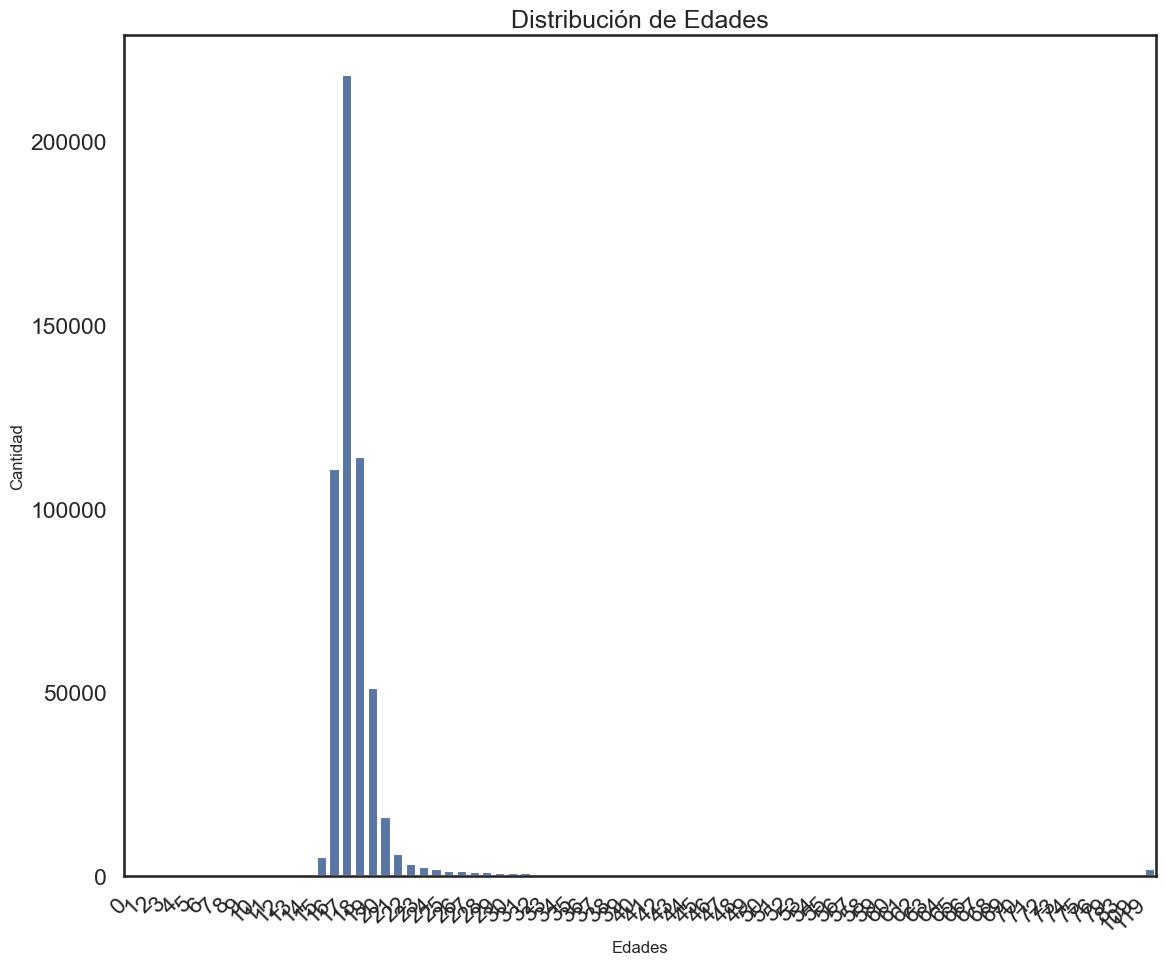

In [189]:
plt.figure(figsize = (12, 10))
sns.countplot(x = 'edad', data = icfes)
sns.set_theme(style = 'white', context = 'talk')

plt.title('Distribución de Edades')
plt.xlabel('Edades', fontsize = 12)
plt.ylabel('Cantidad', fontsize = 12)
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

In [190]:
## Nos quedamos solo con las edades entre 14 y 79 años
icfes = icfes[(icfes["edad"] >= 14) & (icfes["edad"] <= 79)]

In [191]:
# Definir los límites de los bins
bins = list(range(15, 81, 5))  # De 15 a 80 en pasos de 5

# Crear etiquetas para los bins
labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-1)]

# Crear la nueva variable 'grupo_edad'
icfes["grupo_edad"] = pd.cut(icfes["edad"], bins=bins, labels=labels, right=False)

# Verificar distribución
print(icfes["grupo_edad"].value_counts(dropna = False))

grupo_edad
15-19    499012
20-24     29831
25-29      5603
30-34      3285
35-39      2249
40-44      1401
45-49       897
50-54       632
55-59       377
NaN         184
60-64       159
65-69        73
70-74        23
75-79         8
Name: count, dtype: int64


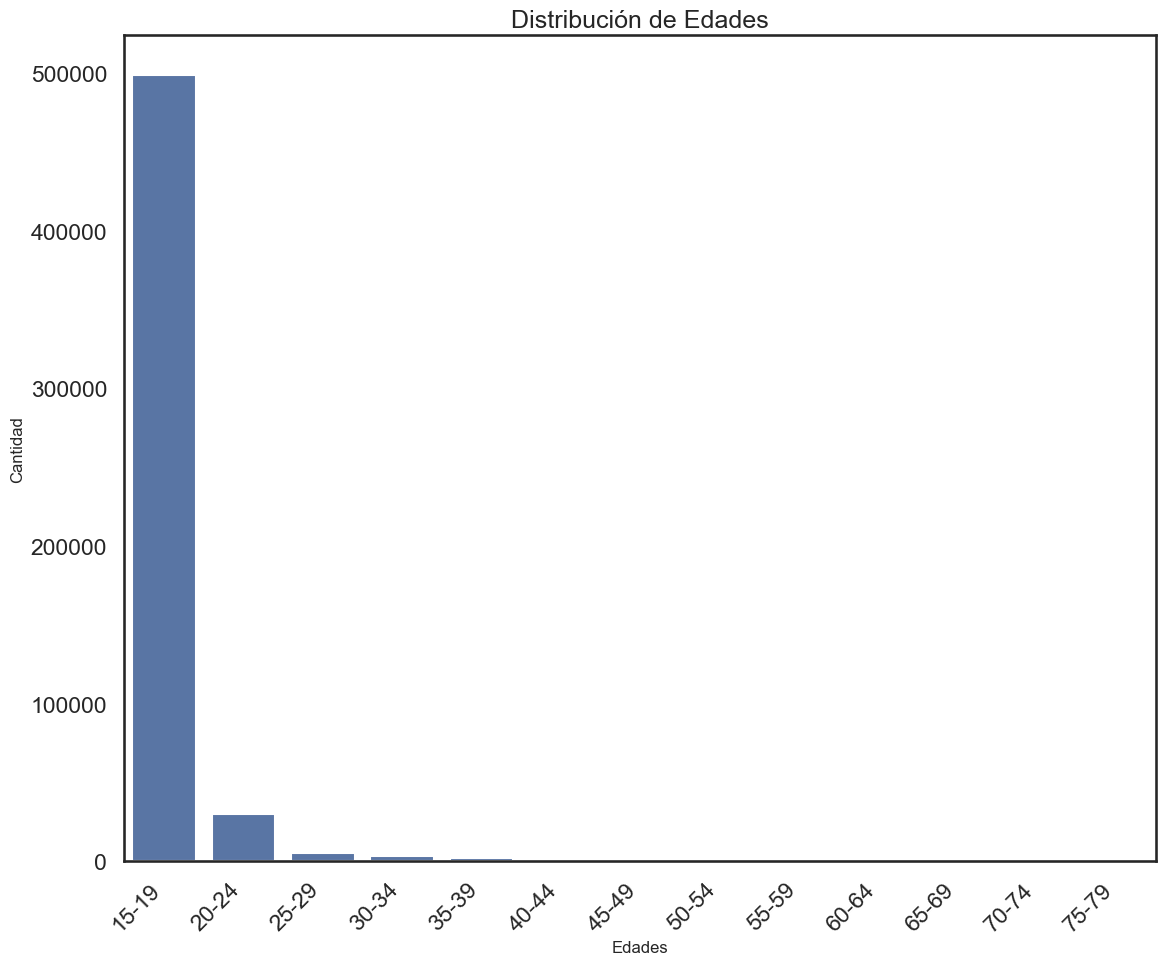

In [192]:
plt.figure(figsize = (12, 10))
sns.countplot(x = 'grupo_edad', data = icfes)
sns.set_theme(style = 'white', context = 'talk')

plt.title('Distribución de Edades')
plt.xlabel('Edades', fontsize = 12)
plt.ylabel('Cantidad', fontsize = 12)
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

In [193]:
icfes["grupo_edad"].value_counts(dropna = False)

grupo_edad
15-19    499012
20-24     29831
25-29      5603
30-34      3285
35-39      2249
40-44      1401
45-49       897
50-54       632
55-59       377
NaN         184
60-64       159
65-69        73
70-74        23
75-79         8
Name: count, dtype: int64

In [194]:
# Crear la variable
icfes['presento_fuera_edad'] = (icfes['edad'] > 19).astype(int)

# Verificar distribución
print("Distribución de la variable:")
print(icfes['presento_fuera_edad'].value_counts())
print('------------------------------------------------------')
print(f"\nPorcentaje fuera de edad: {icfes['presento_fuera_edad'].mean():.2%}")
print('------------------------------------------------------')

# Verificar algunos casos
print("\nVerificación manual:")
print(icfes[['edad', 'presento_fuera_edad']].head(10))

# Estadísticas por grupo
print("\nEdad promedio por grupo:")
print(icfes.groupby('presento_fuera_edad')['edad'].agg(['count', 'mean', 'min', 'max']))

Distribución de la variable:
presento_fuera_edad
0    499196
1     44538
Name: count, dtype: int64
------------------------------------------------------

Porcentaje fuera de edad: 8.19%
------------------------------------------------------

Verificación manual:
   edad  presento_fuera_edad
0    17                    0
1    16                    0
2    18                    0
3    17                    0
4    17                    0
5    20                    1
6    17                    0
7    17                    0
8    17                    0
9    17                    0

Edad promedio por grupo:
                      count  mean  min  max
presento_fuera_edad                        
0                    499196 17.19   14   19
1                     44538 25.44   20   79


### 3.9 VARIABLES DE DATOS GEOGRÁFICOS

In [195]:
icfes['colegio_dpto'].value_counts(dropna = False)

colegio_dpto
Bogotá             82432
Antioquia          73878
Valle              38503
Cundinamarca       36846
Atlantico          32034
Santander          25614
Bolivar            25266
Cordoba            19864
Nariño             16893
Boyaca             16689
Magdalena          16479
Tolima             16276
Norte Santander    15872
Huila              14034
Cauca              13862
Cesar              13209
Meta               12493
Sucre              10868
Risaralda          10716
Caldas             10330
La Guajira          8803
Quindio             6425
Casanare            5927
Choco               4849
Caqueta             4648
Putumayo            4034
Arauca              3330
Guaviare            1011
Amazonas             817
San Andres           616
Vichada              496
Vaupes               352
Guainia              268
Name: count, dtype: int64

In [196]:
# Crear un diccionario con la asignación de departamentos a regiones
departamento_a_region = {
    # Región Andina
    'Antioquia': 'Andina', 'Boyaca': 'Andina', 'Caldas': 'Andina', 'Cundinamarca': 'Andina',
    'Huila': 'Andina', 'Norte Santander': 'Andina', 'Quindio': 'Andina',
    'Risaralda': 'Andina', 'Santander': 'Andina', 'Tolima': 'Andina', 'Bogotá': 'Andina',

    # Región Caribe
    'Atlantico': 'Caribe', 'Bolivar': 'Caribe', 'Cesar': 'Caribe', 'Cordoba': 'Caribe',
    'La Guajira': 'Caribe', 'Magdalena': 'Caribe', 'Sucre': 'Caribe','San Andres': 'Caribe',

    # Región Pacífica
    'Cauca': 'Pacífica', 'Choco': 'Pacífica', 'Nariño': 'Pacífica', 'Valle': 'Pacífica',

    # Región Orinoquía
    'Meta': 'Orinoquía', 'Arauca': 'Orinoquía', 'Casanare': 'Orinoquía', 'Vichada': 'Orinoquía',

    # Región Amazónica
    'Caqueta': 'Amazónica', 'Putumayo': 'Amazónica', 'Amazonas': 'Amazónica',
    'Guainia': 'Amazónica', 'Guaviare': 'Amazónica', 'Vaupes': 'Amazónica'
}

# Crear la nueva variable 'region' en el dataframe ICFES
icfes['region'] = icfes['colegio_dpto'].map(departamento_a_region)

# Verificar si hay departamentos sin asignación
print(icfes[icfes['region'].isna()]['colegio_dpto'].unique())

[]


## 4 BORRAR VARIABLES y FILAS

In [197]:
var_eli = ["est_mpio_presento_examen", "est_dpto_presento_examen", 
           "fecha_nac", "año_nacimiento", 'pertenece_etnia', "dpto_est_reside", "mpio_est_reside"]

icfes = icfes.drop(columns=var_eli)
icfes.sample(4)

,nacionalidad,genero,etnia_estudiante,estrato_casa,num_personas_casa,num_cuartos_casa,nivel_edu_padre,nivel_edu_madre,actividad_madre,actividad_padre,internet,tv,computador,lavadora,microndas,carro,moto,consola,num_libros,freq_leche_derivados,freq_carne_pescado_similares,freq_cereales_frutos_legumbres,situacion_economica_casa,tiempo_lectura,tiempo_internet,horas_trabajo_semanal,tipo_remuneracion,colegio_genero,colegio_naturaleza,colegio_calendario,colegio_caracter,colegio_area,colegio_jornada,colegio_mpio,colegio_dpto,puntaje_lectura,percentil_lectura,nivel_lectura,puntaje_matematicas,percentil_matematicas,nivel_matematicas,puntaje_naturales,percentil_naturales,nivel_naturales,puntaje_sociales,percentil_sociales,nivel_sociales,puntaje_ingles,percentil_ingles,nivel_ingles,puntaje_global,percentil_global,inse_estudiante,nse_estudiante,nse_colegio,edad,grupo_edad,presento_fuera_edad,region
506174,Colombia,Femenino,No,3.00,5-6,2.00,Primaria Inc,Bachiller,Sin Actividad Remunerada,Trabajadores Operativos,0,1,0,1,1,1,1,0,0-10,1-2 veces por semana,1-2 veces por semana,0-1 veces por semana,Peor,30-60 min,Ninguno,No Trabaja,No Aplica,Mixto,Oficial,A,S,Urbano,Unica,El Banco,Magdalena,40,14,2,33,8,1,33,8,1,34,16,1,45.00,43,A-,179,9,43.14,2.00,2.00,18,15-19,0,Caribe
471511,Colombia,Masculino,No,3.00,3-4,3.00,Tecnico/Tecnologo,Tecnico/Tecnologo,Trabajadores Operativos,Microempresario,1,1,1,1,1,1,0,0,26-100,3-5 veces por semana,6-7 veces por semana,6-7 veces por semana,Mejor,No lee,1-3h,No Trabaja,No Aplica,Mixto,Oficial,A,S,Urbano,Mañana,Turbaco,Bolivar,59,74,3,46,36,2,44,37,2,52,67,2,52.00,63,A1,252,56,62.55,3.00,3.00,17,15-19,0,Caribe
132445,Colombia,Femenino,No,1.00,3-4,3.00,Primaria,Tecnico/Tecnologo,Sector Primario,Profesionales,0,1,1,0,0,0,1,0,0-10,1-2 veces por semana,6-7 veces por semana,1-2 veces por semana,Igual,No lee,Ninguno,Trabajo Ocasional,Remuneración Mixta,Mixto,Oficial,A,S,Rural,Noche,San José Del Fragua,Caqueta,48,34,2,47,40,2,43,34,2,32,13,1,36.00,16,A-,210,27,45.01,2.00,2.00,20,20-24,1,Amazónica
450798,Colombia,Masculino,No,1.00,3-4,2.00,Tecnico/Tecnologo,Bachiller,Trabajadores Operativos,Sin Actividad Remunerada,1,1,1,0,1,0,1,1,26-100,1-2 veces por semana,3-5 veces por semana,1-2 veces por semana,Mejor,30-60 min,30-60 min,No Trabaja,No Aplica,Mixto,Oficial,A,S,Urbano,Noche,La Jagua De Ibirico,Cesar,36,7,2,41,22,2,41,28,2,35,21,1,28.00,4,A-,187,13,53.34,3.00,2.00,19,15-19,0,Caribe


In [198]:
# Analizar el porcentaje de missing values
missing_analysis = pd.DataFrame({
    'Column': icfes.columns,
    'Missing_Count': icfes.isnull().sum(),
    'Missing_Percentage': (icfes.isnull().sum() / len(icfes)) * 100
}).sort_values('Missing_Percentage', ascending=False)

print(missing_analysis)

                                                        Column  Missing_Count  \
nivel_edu_padre                                nivel_edu_padre          62323   
estrato_casa                                      estrato_casa          51438   
num_libros                                          num_libros          44454   
nivel_edu_madre                                nivel_edu_madre          39468   
freq_leche_derivados                      freq_leche_derivados          36512   
freq_cereales_frutos_legumbres  freq_cereales_frutos_legumbres          33415   
tiempo_internet                                tiempo_internet          32770   
freq_carne_pescado_similares      freq_carne_pescado_similares          32377   
tiempo_lectura                                  tiempo_lectura          31591   
actividad_madre                                actividad_madre          18225   
situacion_economica_casa              situacion_economica_casa          17803   
actividad_padre             

In [199]:
# Análisis por fila
missing_per_row = icfes.isnull().sum(axis=1)
print(f"Filas sin missing: {(missing_per_row == 0).sum()}")
print(f"Filas con 1 missing: {(missing_per_row == 1).sum()}")
print(f"Filas con 2 missing: {(missing_per_row == 2).sum()}")
print(f"Filas con 1-2 missing: {((missing_per_row >= 1) & (missing_per_row <= 2)).sum()}")
print(f"Filas con 3 missing: {(missing_per_row == 3).sum()}")
print(f"Filas con 4 missing: {(missing_per_row == 4).sum()}")
print(f"Filas con 3-4 missing: {((missing_per_row >= 3) & (missing_per_row <= 4)).sum()}")
print(f"Filas con 5 missing: {(missing_per_row == 5).sum()}")
print(f"Filas con >5 missing: {(missing_per_row > 5).sum()}")

Filas sin missing: 419944
Filas con 1 missing: 70321
Filas con 2 missing: 12969
Filas con 1-2 missing: 83290
Filas con 3 missing: 2248
Filas con 4 missing: 841
Filas con 3-4 missing: 3089
Filas con 5 missing: 594
Filas con >5 missing: 36817


In [200]:
columnas_a_eliminar = ["grupo_edad", "genero"]

filas_antes = icfes.shape[0]

# Eliminar filas con NA en estas columnas
icfes = icfes.dropna(subset=columnas_a_eliminar)

# Mostrar la cantidad de filas restantes
print(f"Cantidad de filas antes de eliminar NA: {filas_antes}")
print("------------------------------------------------------")
print(f"Cantidad de filas después de eliminar NA: {icfes.shape[0]}")
print("------------------------------------------------------")
print(f"Filas eliminadas: {filas_antes - icfes.shape[0]}")

Cantidad de filas antes de eliminar NA: 543734
------------------------------------------------------
Cantidad de filas después de eliminar NA: 543448
------------------------------------------------------
Filas eliminadas: 286


In [201]:
# Información básica del dataset
total_columnas = icfes.shape[1]
print(f"Total de columnas en el dataset: {total_columnas}")
print("\n📊 CONVERSIÓN DE PORCENTAJES A NÚMEROS ABSOLUTOS")
print("=" * 60)

# Calcular cuántos NAs corresponden a cada porcentaje
porcentajes = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

for pct in porcentajes:
    num_nas = (pct / 100) * total_columnas
    num_nas_entero = int(num_nas)
    num_nas_redondeado = round(num_nas)
    
    print(f"{pct}% de NA = {num_nas:.1f} columnas ≈ {num_nas_redondeado} columnas")

Total de columnas en el dataset: 59

📊 CONVERSIÓN DE PORCENTAJES A NÚMEROS ABSOLUTOS
5% de NA = 3.0 columnas ≈ 3 columnas
10% de NA = 5.9 columnas ≈ 6 columnas
15% de NA = 8.8 columnas ≈ 9 columnas
20% de NA = 11.8 columnas ≈ 12 columnas
25% de NA = 14.8 columnas ≈ 15 columnas
30% de NA = 17.7 columnas ≈ 18 columnas
35% de NA = 20.6 columnas ≈ 21 columnas
40% de NA = 23.6 columnas ≈ 24 columnas
45% de NA = 26.6 columnas ≈ 27 columnas
50% de NA = 29.5 columnas ≈ 30 columnas


In [202]:
# Contar NA por fila
na_por_fila = icfes.isna().sum(axis=1)

# Calcular el porcentaje de NA por fila
porcentaje_na_por_fila = (na_por_fila / icfes.shape[1]) * 100

# Información del dataset
total_columnas = icfes.shape[1]

# Calcular equivalencias en números absolutos
nas_10_pct = round((10 / 100) * total_columnas)
nas_20_pct = round((20 / 100) * total_columnas)
nas_25_pct = round((25 / 100) * total_columnas)

# Contar filas con más del 25% de NA
filas_con_mas_25_na = (porcentaje_na_por_fila > 25).sum()

# Estadísticas adicionales
na_promedio_por_fila = porcentaje_na_por_fila.mean()
nas_promedio_absoluto = round((na_promedio_por_fila / 100) * total_columnas)
indice_fila_max_na = na_por_fila.idxmax()
maximo_na = na_por_fila.max()
porcentaje_max_na = porcentaje_na_por_fila.max()

# Resultados con equivalencias
print(f"Dataset tiene {total_columnas} columnas totales")
print("-" * 50)
print(f"Hay {((porcentaje_na_por_fila >= 10) & (porcentaje_na_por_fila < 20)).sum()} filas entre el 10% y 20% de NA (entre {nas_10_pct} y {nas_20_pct-1} columnas faltantes)")
print(f"Hay {(porcentaje_na_por_fila == 20).sum()} filas con exactamente el 20% de NA (exactamente {nas_20_pct} columnas faltantes)")
print(f"Hay {filas_con_mas_25_na} filas con más del 25% de NA (más de {nas_25_pct} columnas faltantes)")
print(f"Promedio de NA por fila: {na_promedio_por_fila:.2f}% (≈ {nas_promedio_absoluto} columnas faltantes)")
print(f"La fila con más NA es la fila {indice_fila_max_na} con {maximo_na} valores NA ({porcentaje_max_na:.2f}%)")

Dataset tiene 59 columnas totales
--------------------------------------------------
Hay 27293 filas entre el 10% y 20% de NA (entre 6 y 11 columnas faltantes)
Hay 0 filas con exactamente el 20% de NA (exactamente 12 columnas faltantes)
Hay 8280 filas con más del 25% de NA (más de 15 columnas faltantes)
Promedio de NA por fila: 1.62% (≈ 1 columnas faltantes)
La fila con más NA es la fila 195819 con 20 valores NA (33.90%)


In [203]:
filas_antes = icfes.shape[0]

# 1. Contar los NA por fila
na_counts_per_row = icfes.isna().sum(axis=1)

# 2. Filtrar las filas con más de 5 NA
rows_to_drop = na_counts_per_row[na_counts_per_row >= 5].index

# 3. Eliminar las filas filtradas
icfes = icfes.drop(rows_to_drop)

print(f"Se eliminaron {len(rows_to_drop)} filas con más de 5 valores NA.")

# Mostrar la cantidad de filas restantes
print(f'Cantidad de filas antes de eliminar NA: {filas_antes}')
print(f"Cantidad de filas después de eliminar NA: {icfes.shape[0]}")
print(f"Filas eliminadas: {filas_antes - icfes.shape[0]}")

Se eliminaron 37391 filas con más de 5 valores NA.
Cantidad de filas antes de eliminar NA: 543448
Cantidad de filas después de eliminar NA: 506057
Filas eliminadas: 37391


In [204]:
icfes.shape

(506057, 59)

In [205]:
icfes.columns

Index(['nacionalidad', 'genero', 'etnia_estudiante', 'estrato_casa',
       'num_personas_casa', 'num_cuartos_casa', 'nivel_edu_padre',
       'nivel_edu_madre', 'actividad_madre', 'actividad_padre', 'internet',
       'tv', 'computador', 'lavadora', 'microndas', 'carro', 'moto', 'consola',
       'num_libros', 'freq_leche_derivados', 'freq_carne_pescado_similares',
       'freq_cereales_frutos_legumbres', 'situacion_economica_casa',
       'tiempo_lectura', 'tiempo_internet', 'horas_trabajo_semanal',
       'tipo_remuneracion', 'colegio_genero', 'colegio_naturaleza',
       'colegio_calendario', 'colegio_caracter', 'colegio_area',
       'colegio_jornada', 'colegio_mpio', 'colegio_dpto', 'puntaje_lectura',
       'percentil_lectura', 'nivel_lectura', 'puntaje_matematicas',
       'percentil_matematicas', 'nivel_matematicas', 'puntaje_naturales',
       'percentil_naturales', 'nivel_naturales', 'puntaje_sociales',
       'percentil_sociales', 'nivel_sociales', 'puntaje_ingles',
       

In [206]:
orden_variables = ['nacionalidad', 'genero', 'region', 'etnia_estudiante', 'edad', 'grupo_edad', 'presento_fuera_edad', 'num_personas_casa', 'num_cuartos_casa', 'estrato_casa',
                   'tiempo_internet', 'internet', 'tv', 'computador', 'lavadora', 'microndas', 'carro', 'moto', 'consola', 'situacion_economica_casa',
                   'num_libros', 'tiempo_lectura', 'freq_leche_derivados', 'freq_carne_pescado_similares', 'freq_cereales_frutos_legumbres',
                   'nivel_edu_padre', 'actividad_padre', 'nivel_edu_madre', 'actividad_madre', 'horas_trabajo_semanal', 'tipo_remuneracion',
                   'colegio_genero', 'colegio_naturaleza', 'colegio_calendario', 'colegio_caracter', 'colegio_area', 'colegio_jornada', 'colegio_mpio', 'colegio_dpto', 'puntaje_lectura',
                   'percentil_lectura', 'puntaje_matematicas', 'percentil_matematicas', 'nivel_matematicas', 'puntaje_naturales', 'percentil_naturales', 'nivel_naturales', 'puntaje_sociales', 
                   'percentil_sociales', 'nivel_sociales', 'puntaje_ingles', 'percentil_ingles', 'nivel_ingles', 'puntaje_global', 'percentil_global', 'inse_estudiante', 
                   'nse_estudiante', 'nse_colegio']

icfes = icfes[orden_variables]

In [207]:
icfes.to_csv('icfes_limpio.csv', index=False, encoding='utf-8-sig')